# Delivered

Description of incremental development/changes throughout the project.

## Cycle 1

1. Business Planning
     - Business problem
     - Input
     - Output
     - Process
     - Desk research
     
2. Feature Engineering
     - Recency
     - Frequency
     - Monetization
    
3. Clustering Validation Metrics
     - WSS (Within-Cluster Sum of Square)
     - SS (Silhouette Score)
       
4. Cluster Analysis
     - 3D plot
     - Cluster Profile
     
     

## Cycle 2

1. Feature Engineering
     - Average Ticket
    
2. Silhouette Analysis
     - Silhouette Analysis
     
3. Cluster Visualization
     - UMAP
     
4. Cluster Profile Analysis
     - Description of cluster centroids

## Cycle 3

1. Descriptive Analysis
     - Numerical attributes
     - Categorical attributes
    
2. Feature Engineering
     - Average Recency
     - Number of Returns
     
2. Data preparation
     - Standard Scaler

## Cycle 4

1. Descriptive Analysis
    - Replace NA
    - Descriptive Statistics
2. Variable Filtering
3. Feature Engeneering
4. EDA
    - Univariate
    - Bibariate


# Solution Planning

## Business Problem

**What is the business problem?**
1. Select the most valuable customers to join the "Loyals" loyalty program.

2. Answering business questions to the marketing team.

### Output

**What will I deliver? / Where does the business team want to see it?**

* 1) List in xls / send by email. It must contain customers who will join Loyals (loyalty program).
    - Format:
   
| client_id | is_loyal |
|-----------|----------|
|1          |yes       |
|2          |no        |

* 2) PDF report answering business questions / send by email and present to the marketing team:
     - Who are the people eligible to participate in the Loyals program?
     - How many customers will be part of the group?
     - What are the main characteristics of these customers?
     - What is the percentage of revenue contribution from Loyals?
     - What is the expected revenue for this group for the coming months?
     - What are the conditions for a person to be eligible for Loyals?
     - What are the conditions for a person to be removed from Loyals?
     - What is the guarantee that the Loyals program is better than the rest of the base?
     - What actions can the marketing team take to increase revenue?

### Input

**Data sources:**
     Dataset "Ecommerce.csv", containing e-commerce sales for the period of one year.

**Tools:**
     Python 3.8.12, Jupyter Notebook, Git, Github.

### Process

**Type of problem:**
Separation of customers by groups.
    
**Main methods:**
    clustering.

**Business Questions:**
* 1) Who are the people eligible to participate in the Loyals program?
    - What does it mean to be eligible? / What are higher "value" customers? (depending on business area)
        - Invoicing:
             - High average ticket
             - High LTV (sum of customer revenue)
             - Low recency (time since last purchase)
             - High basket size (qty products purchased per purchase)
             - Low churn probability (would use the output of a model)
             - High LTV Prediction (would use output from a model)
             - High propensity to buy (would use the output of a model)
        - Cost:
             - Low return rate
        - Shopping experience:
             - High average of the evaluations

 PS: the features will be created in feature engineering.
 
 
* 2) How many customers will be part of the group?
    - Number of customers
    - % in relation to the total number of clients
    
    
* 3) What are the main characteristics of these customers?
    - Write customer characteristics:
        - Age
        - Country
        - Wage
        - Location
     - Write key customer buying behaviors (business metrics)
        - See clustering features (question 1)
         
 For look alike: prospecting similar customers on the internet


* 4) What percentage of revenue contribution comes from Loyals?
    - Calculate the company's total revenue during the year.
    - Calculate the revenue (%) for the Loyals cluster only.
   
   
* 5) What is the expected revenue for this group for the coming months?
    - Loyals LTV calculation (with moving average, time series, arima..)
    - Time Series (ARMA, ARIMA, HoltWinter, etc.)
    - Cohort analysis (with time, location, product..)

 There must be a billing target, consult business.
    
    
* 6) What are the conditions for a person to be eligible for Loyals?
    - Set the evaluation interval (every 1 month, 3 months..)
    - The client's "performance" should be close to the Loyals cluster average.
    
    
* 7) What are the conditions for a person to be removed from Loyals?
    - Customer "performance" is no longer closer to the Loyals cluster average.
   
   
* 8) What is the guarantee that the Loyals program is better than the rest of the base?
    - A/B test
    - Hypothesis test


* 9) What actions can the marketing team take to increase revenue?
    - Discount
    - Purchase preference
    - Cheaper shipping
    - Visit the company
    - Offer personal stylist
    - Recommend cross selling
    - Offer exclusive content

## Solution Benchmarking

### Desk Research

Reading articles on customer segmentation on the internet to understand what the market is doing.

Identify from market solutions, with the business team, what we can do as an MVP.

1. RFM segmentation model.

# Environment Preparation

## Imports

In [1]:
import pandas            as pd
import seaborn           as sns
import datetime          as dt
import umap.umap_        as umap
import numpy             as np
import re

from matplotlib               import pyplot as plt
from tabulate                 import tabulate
from IPython.core.display     import HTML
from sklearn                  import cluster as c
from sklearn                  import metrics as m
from yellowbrick.cluster      import KElbowVisualizer, SilhouetteVisualizer
from plotly                   import express as px
from sklearn                  import preprocessing as pp
from pandas_profiling         import ProfileReport
#from IPython.display         import Image

## Helper Functions

In [2]:
def jupyter_settings():
    """ Optimize general settings, standardize plot sizes, etc. """
    %matplotlib inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [12, 6]
    plt.rcParams['font.size'] = 20
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.set_option( 'display.expand_frame_repr', False )
    pd.set_option('display.max_columns', 30)
    pd.set_option('display.max_rows', 30)
    sns.set()
jupyter_settings()

# Data Collection

In [22]:
#read data
df_raw = pd.read_csv('../data/raw/Ecommerce.csv', encoding='unicode_escape')

In [23]:
df_raw.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom,NaN
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN


In [24]:
df_raw = df_raw.drop('Unnamed: 8', axis=1).copy()
df_raw.sample(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
494833,578277,22940,FELTCRAFT CHRISTMAS FAIRY,1,21-Nov-17,4.25,12723.0,France
463570,576066,23497,CLASSIC CHROME BICYCLE BELL,1,11-Nov-17,1.45,16898.0,United Kingdom
323038,565238,21931,JUMBO STORAGE BAG SUKI,10,31-Aug-17,2.08,16945.0,United Kingdom


# Data Description

In [25]:
df1 = df_raw.copy()

## Rename Columns

In [26]:
df1.sample(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
13209,537423,22600,CHRISTMAS RETROSPOT STAR WOOD,24,4-Dec-16,0.85,14215.0,United Kingdom
902,536488,21895,POTTING SHED SOW 'N' GROW SET,1,29-Nov-16,4.25,17897.0,United Kingdom
218179,556021,84692,BOX OF 24 COCKTAIL PARASOLS,25,6-Jun-17,0.42,12921.0,United Kingdom


In [27]:
df1.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [28]:
df1.columns = ['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'customer_id', 'country']

## Feature Description 

In [29]:
# Explain feature meanings
tab_meanings = [['Columns', 'Meaning'],
        ['invoice_no', 'unique identifier of each transaction'],
        ['stock_code', 'item code'],
        ['description', 'item name'],
        ['quantity', 'quantity of each item purchased per transaction'],
        ['invoice_date', 'the day the transaction took place'],
        ['unit_price', 'product price per unit'],
        ['customer_id', 'unique customer identifier'],
        ['country', 'customer\'s country of residence']
      ]
print(tabulate(tab_meanings, headers='firstrow', stralign='left', tablefmt='simple'))

Columns       Meaning
------------  -----------------------------------------------
invoice_no    unique identifier of each transaction
stock_code    item code
description   item name
quantity      quantity of each item purchased per transaction
invoice_date  the day the transaction took place
unit_price    product price per unit
customer_id   unique customer identifier
country       customer's country of residence


In [30]:
df1.sample(3)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
136948,548006,21380,WOODEN HAPPY BIRTHDAY GARLAND,6,27-Mar-17,2.95,18226.0,United Kingdom
107897,545468,22147,FELTCRAFT BUTTERFLY HEARTS,12,1-Mar-17,1.45,16571.0,United Kingdom
530722,580879,21115,ROSE CARAVAN DOORSTOP,1,4-Dec-17,1.95,17346.0,United Kingdom


## Data Dimensions

In [31]:
print(f'Number of rows: {df1.shape[0]}')
print(f'Number of columns: {df1.shape[1]}')

Number of rows: 541909
Number of columns: 8


In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   invoice_no    541909 non-null  object 
 1   stock_code    541909 non-null  object 
 2   description   540455 non-null  object 
 3   quantity      541909 non-null  int64  
 4   invoice_date  541909 non-null  object 
 5   unit_price    541909 non-null  float64
 6   customer_id   406829 non-null  float64
 7   country       541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## Check NA

In [33]:
df1.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

## Replace NA

In [40]:
#let's try to fill NaN of customer_id when there is invoice_no on df_missing, and not on df_not_missing (if applicable)
df_missing = df1.loc[df1['customer_id'].isna()]
df_not_missing = df1.loc[~df1['customer_id'].isna()]
df_missing.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
622,536414,22139,NaN,56,29-Nov-16,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,29-Nov-16,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,29-Nov-16,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,29-Nov-16,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,29-Nov-16,1.66,NaN,United Kingdom


In [50]:
missing_invoice = df_missing['invoice_no'].drop_duplicates().tolist()
missing_invoice[1:10]

['536544',
 '536545',
 '536546',
 '536547',
 '536549',
 '536550',
 '536552',
 '536553',
 '536554']

In [55]:
#no customer identified 
df_not_missing.loc[df_not_missing['invoice_no'].isin(missing_invoice) == True]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country


In [56]:
#another possibility, is to create and set customer_id to this customers with customer_id = NaN
#in a company, we would try to get these ids, from customer table or other sources, because we would need to interact with this customers.
#since we don't have this option here, and we have about 25% of customers without id, it's interesting not to lose them, because it represents 1/4 of the customer's behavior.
#but even if we could not get this customers_id, we could still create the ids based on invoice_no (identifying the created ones) and use this data to cluster the customers (we don't use customer_id as feature). In the end, we would remove the created ones to pass the customer list to marketing team.  

In [65]:
#create reference
df_invoice = pd.DataFrame(df_missing['invoice_no'].drop_duplicates() )
df_invoice.head() #3710 rows

,invoice_no
622,536414
1443,536544
1970,536545
1971,536546
1972,536547


In [64]:
#new ids to be created
np.arange(19000,19000+len(df_invoice),1)

array([19000, 19001, 19002, ..., 22707, 22708, 22709])

In [66]:
df_invoice['customer_id'] = np.arange(19000,19000+len(df_invoice),1)
df_invoice

,invoice_no,customer_id
622,536414,19000
1443,536544,19001
1970,536545,19002
1971,536546,19003
1972,536547,19004
...,...,...
539162,581435,22705
539207,581439,22706
540451,581492,22707
541264,581497,22708


In [68]:
df1.sample(2)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
318968,564840,85131D,BEADED CRYSTAL HEART PINK ON STICK,1,28-Aug-17,0.83,NaN,United Kingdom
421154,572921,21981,PACK OF 12 WOODLAND TISSUES,6,24-Oct-17,0.39,15993.0,United Kingdom


In [70]:
#bind with original dataset
df1 = pd.merge(df1, df_invoice, on='invoice_no', how='left')
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id_x,country,customer_id_y
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom,NaN
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN


In [73]:
#coalesce equivalent
df1['customer_id'] = df1['customer_id_x'].combine_first(df1['customer_id_y'])
df1.sample(5) #customer_id with original and created ids now

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id_x,country,customer_id_y,customer_id
23457,538201,85049C,ROMANTIC PINKS RIBBONS,1,8-Dec-16,1.25,15723.0,United Kingdom,NaN,15723.0
272567,560772,84919,BLUE CUSHION COVER WITH FLOWER,2,18-Jul-17,5.79,NaN,United Kingdom,21289.0,21289.0
431170,573585,35967,FOLK ART METAL STAR T-LIGHT HOLDER,2,29-Oct-17,0.83,NaN,United Kingdom,22221.0,22221.0
272575,560772,85019A,ROMANTIC IMAGES NOTEBOOK SET,1,18-Jul-17,2.46,NaN,United Kingdom,21289.0,21289.0
488318,577811,21790,VINTAGE SNAP CARDS,12,20-Nov-17,0.85,16311.0,United Kingdom,NaN,16311.0


In [79]:
#drop extra columns
df1 = df1.drop(columns = ['customer_id_x','customer_id_y'], axis=1 )

In [81]:
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,United Kingdom,17850.0
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,United Kingdom,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,United Kingdom,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,United Kingdom,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,United Kingdom,17850.0


In [82]:
#check NA
df1.isna().sum()

invoice_no         0
stock_code         0
description     1454
quantity           0
invoice_date       0
unit_price         0
country            0
customer_id        0
dtype: int64

In [83]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
country          object
customer_id     float64
dtype: object

## Change Types

In [31]:
#correct data types ensure correct calculations using the columns on next sessions

In [84]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
country          object
customer_id     float64
dtype: object

In [85]:
df1.sample(3)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
283600,C561793,22461,SAVOY ART DECO CLOCK,-3,27-Jul-17,3.95,United Kingdom,14414.0
410444,572103,22559,SEASIDE FLYING DISC,1,18-Oct-17,1.25,United Kingdom,17571.0
10272,537237,21069,VINTAGE BILLBOARD TEA MUG,1,4-Dec-16,2.51,United Kingdom,19069.0


In [86]:
#invoice_date
df1['invoice_date'] = pd.to_datetime(df1['invoice_date'], format='%d-%b-%y')

In [87]:
#customer_id
df1['customer_id'] = df1['customer_id'].astype(int)

In [88]:
# invoice_no
#df1['invoice_no'] = df1['invoice_no'].astype(int)
#there are letters on invoice, so let it like object(string). Ex: 'C536379', 'C554197'

In [89]:
# stock_code
#df1['stock_code'] = df1['stock_code'].astype(int)
#there are letters on stock_code, so let it like object(string). Ex: '85123A', '84406B'

In [90]:
df1.sample(3)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
226652,556812,22666,RECIPE BOX PANTRY YELLOW DESIGN,1,2017-06-12,5.79,United Kingdom,20920
209097,555158,22781,GUMBALL MAGAZINE RACK,2,2017-05-30,7.65,United Kingdom,14842
292711,562560,23186,FRENCH STYLE STORAGE JAR CAFE,12,2017-08-03,0.29,EIRE,14156


In [91]:
df1.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
country                 object
customer_id              int64
dtype: object

## Descriptive Statistics

In [93]:
#here we identify state of variables, but take action just on proper sections ahead.
num_attributes = df1.select_dtypes(include=['int64','float64'])
cat_attributes = df1.select_dtypes(exclude=['int64','float64','datetime64[ns]'])

### Numerical Attributes

In [94]:
num_attributes.head()

,quantity,unit_price,customer_id
0,6,2.55,17850
1,6,3.39,17850
2,8,2.75,17850
3,6,3.39,17850
4,6,3.39,17850


In [96]:
# central tendency - mean, median
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T
             
# dispersion - desvio padrão, minimo, maximo, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( np.min ) ).T
d3 = pd.DataFrame( num_attributes.apply( np.max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# concatenate
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,quantity,-80995.00,80995.0,161990.00,9.552250,3.00,218.080957,-0.264076,119769.160031
1,unit_price,-11062.06,38970.0,50032.06,4.611114,2.08,96.759764,186.506972,59005.719097
2,customer_id,12346.00,22709.0,10363.00,16688.840453,16249.00,2911.408666,0.487449,-0.804287


#### quantity

In [97]:
#1. quantity has negative numbers
    # ACTION: separate our dataset into sales and devolutions [variable filtering]

#### unit_price

In [98]:
#2. unit_price = zero
    #ACTION: remove them, and analyse if threshold e really zero [variable filtering]

### Cathegorical Attributes

In [99]:
cat_attributes.head()

,invoice_no,stock_code,description,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
1,536365,71053,WHITE METAL LANTERN,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,United Kingdom


#### invoice_no

In [100]:
cat_attributes.dtypes

invoice_no     object
stock_code     object
description    object
country        object
dtype: object

In [101]:
# problem: we have invoice_no with letters and numbers
#cat_attributes['invoice_no'].astype( int )  # -> error: ex.'C536379'

In [102]:
# identify number of sales with characters on invoice_no: 
df_letter_invoices = df1.loc[df1['invoice_no'].apply( lambda x: bool( re.search( '[^0-9]+', x ) ) ), :]
df_letter_invoices

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
141,C536379,D,Discount,-1,2016-11-29,27.50,United Kingdom,14527
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2016-11-29,4.65,United Kingdom,15311
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2016-11-29,1.65,United Kingdom,17548
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2016-11-29,0.29,United Kingdom,17548
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2016-11-29,0.29,United Kingdom,17548
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2017-12-07,0.83,United Kingdom,14397
541541,C581499,M,Manual,-1,2017-12-07,224.69,United Kingdom,15498
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2017-12-07,10.95,United Kingdom,15311
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2017-12-07,1.25,United Kingdom,17315


In [103]:
#looks like all invoice_no with C, has negative quantity. Lets check:
print( f'Total number of invoices: {len( df_letter_invoices )}')
print( f'Total number of negative quantity: {len( df_letter_invoices[ df_letter_invoices["quantity"] < 0 ] )}') 
#3 of difference, let's ignore them

Total number of invoices: 9291
Total number of negative quantity: 9288


In [104]:
#1. since "quantity" variable will be separate into 2 purchase and return datasets, the "invoice_no" with letters will automatically be separated at the return dataset. 
    #ACTION: No action.

#### stock_code

In [105]:
df1['stock_code']

0         85123A
1          71053
2         84406B
3         84029G
4         84029E
           ...  
541904     22613
541905     22899
541906     23254
541907     23255
541908     22138
Name: stock_code, Length: 541909, dtype: object

In [106]:
# get stock_codes with only letters
df1.loc[df1['stock_code'].apply( lambda x: bool( re.search( '^[a-zA-Z]+$', x ) ) ), 'stock_code'].unique()
#now we have new stock_codes!

array(['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY',
       'DCGSSGIRL', 'PADS', 'B', 'CRUK'], dtype=object)

In [107]:
#find samples:
df1.loc[df1['stock_code'].apply( lambda x: bool( re.search( '^[a-zA-Z]+$', x ) ) ) ].sample(10)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
98187,544673,M,Manual,25,2017-02-20,0.42,United Kingdom,13421
120794,546678,POST,POSTAGE,3,2017-03-13,18.00,France,12681
34471,539391,POST,POSTAGE,2,2016-12-15,15.00,Belgium,12417
221712,C556265,D,Discount,-1,2017-06-07,28.04,United Kingdom,16684
86963,543625,POST,POSTAGE,2,2017-02-08,18.00,France,12583
519354,580144,POST,POSTAGE,1,2017-11-30,18.00,France,12684
94055,544323,DOT,DOTCOM POSTAGE,1,2017-02-15,179.94,United Kingdom,19683
365290,568703,M,Manual,183,2017-09-26,0.08,United Kingdom,12748
29090,538707,M,Manual,2,2016-12-12,0.21,United Kingdom,17894
310402,C564183,POST,POSTAGE,-1,2017-08-21,14.95,United Kingdom,21535


In [108]:
#check stock_code with letters only 
df1.loc[df1['stock_code'].apply( lambda x: bool( re.search( '^[a-zA-Z]+$', x ) ) ), 'stock_code'].count()

2759

In [110]:
#2. stock_code has values useless values: ['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY','DCGSSGIRL', 'PADS', 'B', 'CRUK']
    #ACTION: remove them [variable filtering]

#### description

In [111]:
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,United Kingdom,17850
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,United Kingdom,17850
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,United Kingdom,17850
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,United Kingdom,17850
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,United Kingdom,17850


In [112]:
#3. description is an useless feature so far
    #ACTION: Delete them [variable filtering] 

#### country

In [113]:
df1['country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [114]:
len(df1['country'].unique())

38

In [115]:
df1['country'].value_counts(normalize=True)

United Kingdom    0.914320
Germany           0.017521
France            0.015790
EIRE              0.015124
Spain             0.004674
                    ...   
Lithuania         0.000065
Brazil            0.000059
Czech Republic    0.000055
Bahrain           0.000035
Saudi Arabia      0.000018
Name: country, Length: 38, dtype: float64

In [118]:
#unique users per country
df1[['customer_id','country']].drop_duplicates().groupby('country').count().reset_index().sort_values('customer_id', ascending=False).head(10)

,country,customer_id
36,United Kingdom,7587
14,Germany,95
13,France,90
10,EIRE,44
31,Spain,31
3,Belgium,25
33,Switzerland,24
27,Portugal,20
19,Italy,15
16,Hong Kong,15


In [119]:
#4. country can be a new feature, but needs cleaning
    #ACTION: remove "European Community", since it's just 1 customer from this location, and "Unspecified" too, since it's just 4 customers from there. [variable filtering]
    #ACTION 2: # let's also replace the country name by its lat and lon (center of country) [feature engeneering]

# Variable Filtering

In [120]:
#In our scenario, it's needed to do the Variable Filtering BEFORE the Feature Engeneering.
  #Thats because on F.E, we change our granularity, and keep the variable filter after this won't make sense!

In [121]:
# In this section, let's execute actions identified on Descriptive Statistical

#Numerical Attributes
#1. quantity has negative numbers
    #ACTION: separate our dataset into sales and devolutions [variable filtering] 
        #-> LAST TO DO!
    
#2. unit_price = zero
    #ACTION: remove them, and analyse if threshold e really zero [variable filtering]
    
#Cathegorical Attributes
#2. stock_code has values useless values: ['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY','DCGSSGIRL', 'PADS', 'B', 'CRUK']
    #ACTION: remove them [variable filtering]
    
#3. description is an useless feature so far
    #ACTION: remove them [variable filtering] 

#4. country can be a new feature, but needs cleaning
    #ACTION: remove "European Community", since it's just 1 customer from this location, and "Unspecified" too, since it's just 4 customers from there. [variable filtering]

In [122]:
df2 = df1.copy()

## Cathegorical Attributes

### [2] stock_code

In [123]:
#2. stock_code has values useless values: ['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY','DCGSSGIRL', 'PADS', 'B', 'CRUK']
    #ACTION: remove them [variable filtering]
    
#identify them
df2.loc[df2['stock_code'].isin( ['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY','DCGSSGIRL', 'PADS', 'B', 'CRUK'] ) ] #2759 rows

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
45,536370,POST,POSTAGE,3,2016-11-29,18.00,France,12583
141,C536379,D,Discount,-1,2016-11-29,27.50,United Kingdom,14527
386,536403,POST,POSTAGE,1,2016-11-29,15.00,Netherlands,12791
1123,536527,POST,POSTAGE,1,2016-11-29,18.00,Germany,12662
1814,536544,DOT,DOTCOM POSTAGE,1,2016-11-29,569.77,United Kingdom,19001
...,...,...,...,...,...,...,...,...
541540,581498,DOT,DOTCOM POSTAGE,1,2017-12-07,1714.17,United Kingdom,22709
541541,C581499,M,Manual,-1,2017-12-07,224.69,United Kingdom,15498
541730,581570,POST,POSTAGE,1,2017-12-07,18.00,Germany,12662
541767,581574,POST,POSTAGE,2,2017-12-07,18.00,Germany,12526


In [124]:
#keem just not in list
df2 = df2.loc[~df2['stock_code'].isin( ['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY','DCGSSGIRL', 'PADS', 'B', 'CRUK'] ) ] #539150 rows

### [3] description

In [126]:
#3. description is an useless feature so far
    #ACTION: remove them [variable filtering] 
df2 = df2.drop('description', axis=1)

### [4] country

In [127]:
#4. country can be a new feature, but needs cleaning
    #ACTION: remove "European Community", since it's just 1 customer from this location, and "Unspecified" too, since it's just 4 customers from there. [variable filtering]
df2[df2['country'].isin( ['European Community', 'Unspecified' ] ) ] #504 rows

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
152712,549687,20685,2,2017-04-09,7.95,Unspecified,12363
152713,549687,22691,2,2017-04-09,7.95,Unspecified,12363
152714,549687,48116,2,2017-04-09,7.95,Unspecified,12363
152715,549687,21213,24,2017-04-09,0.55,Unspecified,12363
152716,549687,21977,24,2017-04-09,0.55,Unspecified,12363
...,...,...,...,...,...,...,...
498778,578539,22560,24,2017-11-22,1.25,Unspecified,22545
498779,578539,23570,12,2017-11-22,1.25,Unspecified,22545
498780,578539,23571,12,2017-11-22,1.65,Unspecified,22545
498781,578539,84992,24,2017-11-22,0.55,Unspecified,22545


In [128]:
#remove them:
df2 = df2[~df2['country'].isin( ['European Community', 'Unspecified' ] ) ]

## Numerical Attributes

### [2] unit_price

In [129]:
#2. unit_price = zero
    #ACTION: remove them, and analyse if threshold e really zero [variable filtering]
    #(starting with item #2, since we are removing lines here, and will separate dataset next)
    
#check products with unit_price = 0
df2.loc[df2['unit_price'] == 0 ].drop_duplicates()

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
622,536414,22139,56,2016-11-29,0.0,United Kingdom,19000
1970,536545,21134,1,2016-11-29,0.0,United Kingdom,19002
1971,536546,22145,1,2016-11-29,0.0,United Kingdom,19003
1972,536547,37509,1,2016-11-29,0.0,United Kingdom,19004
1987,536549,85226A,1,2016-11-29,0.0,United Kingdom,19005
...,...,...,...,...,...,...,...
536981,581234,72817,27,2017-12-06,0.0,United Kingdom,22698
538504,581406,46000M,240,2017-12-06,0.0,United Kingdom,22701
538505,581406,46000S,300,2017-12-06,0.0,United Kingdom,22701
538554,581408,85175,20,2017-12-06,0.0,United Kingdom,22702


In [130]:
#check > 0 asc
df2.loc[df2['unit_price'] > 0 ].sort_values('unit_price').head(10)

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
361741,568375,BANK CHARGES,1,2017-09-24,0.001,United Kingdom,13405
4287,C536757,84347,-9360,2016-11-30,0.030,United Kingdom,15838
325477,565442,16045,100,2017-09-02,0.040,Germany,12627
267502,560300,16045,100,2017-07-16,0.040,EIRE,14911
407634,571904,16045,100,2017-10-17,0.040,Germany,12522
382404,569900,16045,100,2017-10-04,0.040,United Kingdom,17651
383665,570082,16045,100,2017-10-05,0.040,Germany,12524
308637,564043,16045,100,2017-08-20,0.040,United Kingdom,14414
506918,579161,16045,100,2017-11-26,0.040,United Kingdom,17379
400404,571308,16045,100,2017-10-15,0.040,Germany,12475


In [131]:
#let's define as threshold products >= 0.04 cents
df2.loc[df2['unit_price'] >= 0.04 ].sort_values('unit_price').head(10)

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
369625,569077,16045,100,2017-09-28,0.04,United Kingdom,13092
325878,565460,16045,100,2017-09-03,0.04,United Kingdom,16843
269871,560504,16045,100,2017-07-17,0.04,United Kingdom,13081
484163,577522,16045,100,2017-11-18,0.04,United Kingdom,15988
263241,559979,16045,100,2017-07-12,0.04,United Kingdom,14862
379865,569714,16045,100,2017-10-03,0.04,United Kingdom,18033
303023,563503,16045,200,2017-08-15,0.04,United Kingdom,16488
427893,573405,16045,100,2017-10-28,0.04,United Kingdom,13822
264630,560106,16045,100,2017-07-12,0.04,United Kingdom,17554
464007,576076,16045,100,2017-11-11,0.04,United Kingdom,14382


In [132]:
df2 = df2.loc[df2['unit_price'] >= 0.04 ]

### [1] quantity

In [133]:
#1. quantity has negative numbers
    # ACTION: separate our dataset into sales and devolutions [variable filtering]
    
df2_returns = df2.loc[df2['quantity'] < 0]
df2_purchases = df2.loc[df2['quantity'] > 0] #there is no quantity == 0.
#done, we will use these to create features soon.

# Feature Engeneering

In [34]:
#save dataset
df2.to_csv("../data/interim/cycle4/df2_data_description_done.csv")
df2_returns.to_csv("../data/interim/cycle4/df2_returns_raw.csv")
df2_purchases.to_csv("../data/interim/cycle4/df2_purchases_raw.csv")

In [43]:
#load dataset
#df2 = pd.read_csv("../data/interim/cycle4/df2_data_description_done.csv", index_col=0) 
#df2_returns = pd.read_csv("../data/interim/cycle4/df2_returns_raw.csv", index_col=0) 
#df2_purchases = pd.read_csv("../data/interim/cycle4/df2_purchases_raw.csv", index_col=0) 

In [47]:
df3 = df2.copy()
df3_returns = df2_returns.copy()
df3_purchases = df2_purchases.copy()

In [631]:
#ideas of future features
## moving average - 7d, 14d, 30d
## quantity of purchases per month, before day 15 and after that
## average financial
## basket size price

In [632]:
# our current granularity is: stock_code + invoice_date,
# we need to have customer as granularity, to have is's features on a new table.
# let's start adjusting the dataset to build an RFM Segmentation Model (Recency, Frequency, Monetary Value)
# cycle 4: let's add the variables from the project planning

In [633]:
#create the referente table with uniques customer_id (and reset index) 
df_ref = df3.drop(['invoice_no', 'stock_code', 'quantity', 'invoice_date',
       'unit_price', 'country'], axis=1).drop_duplicates(ignore_index=True).copy()

## Gross Revenue

In [634]:
# Gross Revenue: (quantity * price of each purchase)
    #here, we just want to consider gross revenue from sales, not discounting returns, so lets use df3_purchases
df3_purchases['gross_revenue'] = df3_purchases['quantity'] * df3_purchases['unit_price']
df_monetary = df3_purchases[['customer_id','gross_revenue']].groupby('customer_id').sum().reset_index()
df_ref = pd.merge( df_ref, df_monetary, on='customer_id', how='left' )

In [635]:
df_ref.sample(3) #5787 rows

,customer_id,gross_revenue
4273,15608,1093.68
5342,13532,210.31
5782,22706,5699.00


In [636]:
df_ref.isna().sum()

customer_id       0
gross_revenue    91
dtype: int64

In [637]:
df_ref.loc[df_ref['gross_revenue'].isna() ].head()
#we left joined gross_revenue of customers from df3_purchases with df_ref (from df3, who has all customers, (df3_returns + df3_purchases))
#so, there are 91 customer who don't have purchases, just returns, thats why they are NA for gross_revenue here. Binding df3_purchases with df_ref on next variables, should return these same 91 customers.

,customer_id,gross_revenue
161,17547,NaN
188,13958,NaN
191,16995,NaN
217,14213,NaN
220,14679,NaN


## Recency

In [638]:
# Recency: number of days since last purchase
    #here, we want to know the last day this customer bought. If he returned, we don't want to count that day as last purchase, so let's consider just df3_purchases
df_recency = df3_purchases[['customer_id','invoice_date']].groupby('customer_id').max().reset_index()
df_recency['recency_days'] = (df3_purchases['invoice_date'].max() - df_recency['invoice_date']).dt.days
df_recency = df_recency[['customer_id', 'recency_days']].copy()
df_ref = pd.merge( df_ref, df_recency, on='customer_id', how='left' )

In [639]:
df_ref.sample(3) 
#5787 rows

,customer_id,gross_revenue,recency_days
2387,15381,596.85,213.0
3603,14241,213.70,183.0
559,12870,NaN,NaN


In [640]:
#check NAs
df_ref.isna().sum()
#there are the same 91 customers who never bought anything, just returned

customer_id       0
gross_revenue    91
recency_days     91
dtype: int64

## Invoice Quantity

In [641]:
#quantity of invoices per customer
    #consider just purchases, not returns
df_invoice = df3_purchases[['customer_id','invoice_no']].drop_duplicates().groupby('customer_id').count().reset_index().rename(columns={'invoice_no':"qtt_invoices"})
df_ref = pd.merge( df_ref, df_invoice, on='customer_id', how='left')

In [642]:
df_ref.sample(3) 
#5787

,customer_id,gross_revenue,recency_days,qtt_invoices
5746,12367,150.90,4.0,1.0
1784,16998,295.00,149.0,4.0
378,12474,6745.79,17.0,18.0


In [643]:
df_ref.isna().sum()
#same 91 people just returned

customer_id       0
gross_revenue    91
recency_days     91
qtt_invoices     91
dtype: int64

In [644]:
#conference
df_conf= df3_purchases.loc[df3_purchases['customer_id'] == 15777]
df_conf

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id,gross_revenue
28959,538671,22111,9,2016-12-11,4.95,United Kingdom,15777,44.55
28960,538671,22180,12,2016-12-11,8.50,United Kingdom,15777,102.00
28961,538671,18098C,48,2016-12-11,2.55,United Kingdom,15777,122.40
28962,538671,85123A,32,2016-12-11,2.55,United Kingdom,15777,81.60
28963,538671,21892,12,2016-12-11,1.25,United Kingdom,15777,15.00
71631,542154,22111,24,2017-01-24,4.25,United Kingdom,15777,102.00
71632,542155,21348,112,2017-01-24,2.55,United Kingdom,15777,285.60
154401,549909,23053,2,2017-04-10,8.25,United Kingdom,15777,16.50
154402,549909,22957,6,2017-04-10,2.95,United Kingdom,15777,17.70
154403,549909,21191,6,2017-04-10,2.10,United Kingdom,15777,12.60


In [645]:
df_conf[['customer_id','invoice_no']].drop_duplicates().groupby('customer_id').count().reset_index()
#ok!

,customer_id,invoice_no
0,15777,4


## Unique Products

In [646]:
#quantity of distinct products per customer
    #consider just purchases, not returns
df_invoice = df3_purchases[['customer_id','stock_code']].drop_duplicates().groupby('customer_id').count().reset_index().rename(columns={'stock_code':"unique_products"})
df_ref = pd.merge( df_ref, df_invoice, on='customer_id', how='left')

In [647]:
df_ref.isna().sum()
#same 91 people just returned

customer_id         0
gross_revenue      91
recency_days       91
qtt_invoices       91
unique_products    91
dtype: int64

In [648]:
df_ref.sample(5)

,customer_id,gross_revenue,recency_days,qtt_invoices,unique_products
2964,20344,1734.50,235.0,1.0,300.0
4668,15484,3594.31,1.0,4.0,135.0
5664,17806,546.04,11.0,1.0,43.0
3980,12556,603.71,50.0,2.0,100.0
4978,14624,225.85,57.0,2.0,13.0


In [649]:
#conference
df_conf = df3_purchases.loc[ df3_purchases['customer_id'] == 13525]
df_conf

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id,gross_revenue
146783,549020,84879,160,2017-04-03,1.45,United Kingdom,13525,232.00
146784,549020,72801C,48,2017-04-03,1.06,United Kingdom,13525,50.88
500532,578785,84879,160,2017-11-23,1.45,United Kingdom,13525,232.00
500533,578785,22622,2,2017-11-23,11.95,United Kingdom,13525,23.90
500534,578785,23395,12,2017-11-23,3.75,United Kingdom,13525,45.00
500535,578785,23396,12,2017-11-23,3.75,United Kingdom,13525,45.00


In [650]:
#needs drop duplicates
df_conf[['customer_id','stock_code']].drop_duplicates().groupby('customer_id').count().reset_index()
#ok!

,customer_id,stock_code
0,13525,5


## Total Products

In [651]:
#quantity of items purchased per customer
    #consider just purchases, not returns
df_prod_quantity = df3_purchases[['customer_id','quantity']].groupby('customer_id').sum().reset_index().rename(columns ={'quantity':'total_products'})
df_ref = pd.merge( df_ref, df_prod_quantity, on='customer_id', how='left')

In [652]:
df_ref.sample(3) 
#5787

,customer_id,gross_revenue,recency_days,qtt_invoices,unique_products,total_products
1,13047,3232.59,56.0,9.0,105.0,1390.0
798,13802,4599.42,138.0,3.0,55.0,2572.0
3090,20472,4.20,220.0,1.0,2.0,2.0


In [653]:
df_ref.isna().sum()
#same 91 people just returned

customer_id         0
gross_revenue      91
recency_days       91
qtt_invoices       91
unique_products    91
total_products     91
dtype: int64

In [654]:
#conference
df_conf = df3_purchases.loc[df3_purchases['customer_id'] == 14271 ] 
df_conf

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id,gross_revenue
171181,551395,85199L,12,2017-04-26,0.65,United Kingdom,14271,7.80
171182,551395,23061,12,2017-04-26,1.25,United Kingdom,14271,15.00
171183,551395,85123A,6,2017-04-26,2.95,United Kingdom,14271,17.70
171184,551395,84949,6,2017-04-26,1.65,United Kingdom,14271,9.90
171185,551395,22822,2,2017-04-26,5.95,United Kingdom,14271,11.90
171186,551395,20846,12,2017-04-26,1.25,United Kingdom,14271,15.00
171187,551395,84247G,12,2017-04-26,0.42,United Kingdom,14271,5.04
171188,551395,21506,12,2017-04-26,0.42,United Kingdom,14271,5.04
171189,551395,22030,12,2017-04-26,0.42,United Kingdom,14271,5.04
171190,551395,22796,2,2017-04-26,9.95,United Kingdom,14271,19.90


In [655]:
df_conf[['customer_id', 'quantity']].groupby('customer_id').sum().reset_index()
#ok

,customer_id,quantity
0,14271,88


## Average Ticket

In [657]:
df_ref.head()

,customer_id,gross_revenue,recency_days,qtt_invoices,unique_products,total_products
0,17850,5391.21,372.0,34.0,21.0,1733.0
1,13047,3232.59,56.0,9.0,105.0,1390.0
2,12583,6705.38,2.0,15.0,114.0,5028.0
3,13748,948.25,95.0,5.0,24.0,439.0
4,15100,876.00,333.0,3.0,1.0,80.0


In [658]:
#average_ticket (average gross_revenue customers spend on all purchases)
     #consider just purchases, not returns
df_avg_ticket = df3_purchases[['customer_id','gross_revenue']].groupby('customer_id').mean().reset_index().rename(columns={'gross_revenue':'avg_ticket'})
df_ref = pd.merge( df_ref, df_avg_ticket, on='customer_id', how='left')

In [659]:
df_ref.sample(3) #5787 rows 

,customer_id,gross_revenue,recency_days,qtt_invoices,unique_products,total_products,avg_ticket
4900,12420,600.39,63.0,1.0,29.0,345.0,20.703103
2387,15381,596.85,213.0,2.0,8.0,171.0,74.606250
949,14735,6050.69,3.0,31.0,98.0,2263.0,31.350725


In [660]:
df_ref.isna().sum()
#Same 91 NAs

customer_id         0
gross_revenue      91
recency_days       91
qtt_invoices       91
unique_products    91
total_products     91
avg_ticket         91
dtype: int64

In [661]:
#conference
df_conf = df3_purchases.loc[df3_purchases['customer_id'] == 15100 ]
df_conf

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id,gross_revenue
65,536374,21258,32,2016-11-29,10.95,United Kingdom,15100,350.4
17541,537767,21258,32,2016-12-06,10.95,United Kingdom,15100,350.4
50848,540563,21258,16,2017-01-08,10.95,United Kingdom,15100,175.2


In [662]:
df_conf[['customer_id','gross_revenue']].groupby('customer_id').mean().reset_index().rename(columns={'gross_revenue':'avg_ticket'})
#ok!

,customer_id,avg_ticket
0,15100,292.0


## Average Recency

In [668]:
df_ref.head()

,customer_id,gross_revenue,recency_days,qtt_invoices,unique_products,total_products,avg_ticket
0,17850,5391.21,372.0,34.0,21.0,1733.0,18.152222
1,13047,3232.59,56.0,9.0,105.0,1390.0,18.904035
2,12583,6705.38,2.0,15.0,114.0,5028.0,28.902500
3,13748,948.25,95.0,5.0,24.0,439.0,33.866071
4,15100,876.00,333.0,3.0,1.0,80.0,292.000000


In [665]:
# Average recency: average numer of days between customer's purchases
    #consider just purchases, not returns

In [672]:
#get invoices (purchases) by customer, ordering Custormer and Invoice Desc:
df_aux = df3_purchases[['customer_id', 'invoice_date']].drop_duplicates().sort_values( ['customer_id', 'invoice_date'], ascending=[False, False] )
df_aux.head()

,customer_id,invoice_date
541323,22709,2017-12-07
541264,22708,2017-12-07
540451,22707,2017-12-07
539207,22706,2017-12-06
539162,22705,2017-12-06


In [673]:
#shift() gets value from last line, and pass to next, we will use it to calculate diff between purchase dates
df_aux['next_customer_id'] = df_aux['customer_id'].shift() # next customer
df_aux['next_invoice_date'] = df_aux['invoice_date'].shift() # next invoince date
df_aux

,customer_id,invoice_date,next_customer_id,next_invoice_date
541323,22709,2017-12-07,NaN,NaT
541264,22708,2017-12-07,22709.0,2017-12-07
540451,22707,2017-12-07,22708.0,2017-12-07
539207,22706,2017-12-06,22707.0,2017-12-07
539162,22705,2017-12-06,22706.0,2017-12-06
...,...,...,...,...
220572,12347,2017-06-07,12347.0,2017-07-31
148285,12347,2017-04-05,12347.0,2017-06-07
72246,12347,2017-01-24,12347.0,2017-04-05
14938,12347,2016-12-05,12347.0,2017-01-24


In [674]:
#build diff dates per customer and invoice date
df_aux['avg_recency'] = df_aux.apply( lambda x: ( x['next_invoice_date'] - x['invoice_date'] ).days if x['customer_id'] == x['next_customer_id'] else np.nan, axis=1 )
df_aux

,customer_id,invoice_date,next_customer_id,next_invoice_date,avg_recency
541323,22709,2017-12-07,NaN,NaT,NaN
541264,22708,2017-12-07,22709.0,2017-12-07,NaN
540451,22707,2017-12-07,22708.0,2017-12-07,NaN
539207,22706,2017-12-06,22707.0,2017-12-07,NaN
539162,22705,2017-12-06,22706.0,2017-12-06,NaN
...,...,...,...,...,...
220572,12347,2017-06-07,12347.0,2017-07-31,54.0
148285,12347,2017-04-05,12347.0,2017-06-07,63.0
72246,12347,2017-01-24,12347.0,2017-04-05,71.0
14938,12347,2016-12-05,12347.0,2017-01-24,50.0


In [675]:
#let's drop NAs, because some customers have just one purchase, so they don't have avg_recency. 
df_aux = df_aux.drop( ['invoice_date', 'next_customer_id', 'next_invoice_date'], axis=1 ).dropna()
#now we have avg_recency per purchase
df_aux

,customer_id,avg_recency
392716,18287,16.0
198716,18287,143.0
514067,18283,6.0
494085,18283,7.0
456033,18283,13.0
...,...,...
286621,12347,90.0
220572,12347,54.0
148285,12347,63.0
72246,12347,71.0


In [676]:
# average recency per customer:
df_avg_recency = df_aux.groupby( 'customer_id' ).mean().reset_index()
df_avg_recency

,customer_id,avg_recency
0,12347,60.833333
1,12348,94.333333
2,12352,43.333333
3,12356,151.500000
4,12358,149.000000
...,...,...
2769,18272,48.800000
2770,18273,127.500000
2771,18282,119.000000
2772,18283,25.692308


In [677]:
# bind
df_ref = pd.merge( df_ref, df_avg_recency, on='customer_id', how='left' )
df_ref.isna().sum()

customer_id           0
gross_revenue        91
recency_days         91
qtt_invoices         91
unique_products      91
total_products       91
avg_ticket           91
avg_recency        3013
dtype: int64

In [575]:
#we have 3013 customers with NA in avg_recency

In [678]:
df_ref.head()

,customer_id,gross_revenue,recency_days,qtt_invoices,unique_products,total_products,avg_ticket,avg_recency
0,17850,5391.21,372.0,34.0,21.0,1733.0,18.152222,1.000000
1,13047,3232.59,56.0,9.0,105.0,1390.0,18.904035,52.833333
2,12583,6705.38,2.0,15.0,114.0,5028.0,28.902500,26.500000
3,13748,948.25,95.0,5.0,24.0,439.0,33.866071,92.666667
4,15100,876.00,333.0,3.0,1.0,80.0,292.000000,20.000000


In [687]:
#conference id = 12348
#avg_recency = 94.333333
df_ref.loc[df_ref['customer_id'] == 12348] 

,customer_id,gross_revenue,recency_days,qtt_invoices,unique_products,total_products,avg_ticket,avg_recency
965,12348,1437.24,75.0,4.0,21.0,2332.0,53.231111,94.333333


In [681]:
#conference
df_aux = df3_purchases.loc[df3_purchases['customer_id'] == 12348]
df_aux.head()

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id,gross_revenue
34083,539318,84992,72,2016-12-14,0.55,Finland,12348,39.6
34084,539318,22951,72,2016-12-14,0.55,Finland,12348,39.6
34085,539318,84991,24,2016-12-14,0.55,Finland,12348,13.2
34086,539318,84991,120,2016-12-14,0.42,Finland,12348,50.4
34087,539318,21213,24,2016-12-14,0.55,Finland,12348,13.2


In [682]:
#get invoices (purchases) by customer, ordering Custormer and Invoice Desc:
df_aux = df_aux[['customer_id', 'invoice_date']].drop_duplicates().sort_values( ['customer_id', 'invoice_date'], ascending=[False, False] )
df_aux

,customer_id,invoice_date
359058,12348,2017-09-23
146013,12348,2017-04-03
70051,12348,2017-01-23
34083,12348,2016-12-14


In [683]:
#shift() gets value from last line, and pass to next, we will use it to calculate diff between purchase dates
df_aux['next_customer_id'] = df_aux['customer_id'].shift() # next customer
df_aux['next_invoice_date'] = df_aux['invoice_date'].shift() # next invoince date
df_aux

,customer_id,invoice_date,next_customer_id,next_invoice_date
359058,12348,2017-09-23,NaN,NaT
146013,12348,2017-04-03,12348.0,2017-09-23
70051,12348,2017-01-23,12348.0,2017-04-03
34083,12348,2016-12-14,12348.0,2017-01-23


In [684]:
#build diff dates per customer and invoice date
df_aux['avg_recency'] = df_aux.apply( lambda x: ( x['next_invoice_date'] - x['invoice_date'] ).days if x['customer_id'] == x['next_customer_id'] else np.nan, axis=1 )
df_aux

,customer_id,invoice_date,next_customer_id,next_invoice_date,avg_recency
359058,12348,2017-09-23,NaN,NaT,NaN
146013,12348,2017-04-03,12348.0,2017-09-23,173.0
70051,12348,2017-01-23,12348.0,2017-04-03,70.0
34083,12348,2016-12-14,12348.0,2017-01-23,40.0


In [685]:
#let's drop NAs, because some customers have just one purchase, so they don't have avg_recency. 
df_aux = df_aux.drop( ['invoice_date', 'next_customer_id', 'next_invoice_date'], axis=1 ).dropna()
#now we have avg_recency per purchase
df_aux

,customer_id,avg_recency
146013,12348,173.0
70051,12348,70.0
34083,12348,40.0


In [686]:
# average recency per customer:
df_avg_recency = df_aux.groupby( 'customer_id' ).mean().reset_index()
df_avg_recency

,customer_id,avg_recency
0,12348,94.333333


## Daily Purchase Rate

In [322]:
# purchase rate per day during the period

In [697]:
df3_purchases.head()

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id,gross_revenue
0,536365,85123A,6,2016-11-29,2.55,United Kingdom,17850,15.30
1,536365,71053,6,2016-11-29,3.39,United Kingdom,17850,20.34
2,536365,84406B,8,2016-11-29,2.75,United Kingdom,17850,22.00
3,536365,84029G,6,2016-11-29,3.39,United Kingdom,17850,20.34
4,536365,84029E,6,2016-11-29,3.39,United Kingdom,17850,20.34


In [698]:
#per customer and invoice, get min and max invoice date, total days between min and max, and quantity of invoices
df_aux = ( df3_purchases[['customer_id', 'invoice_no', 'invoice_date']].drop_duplicates()
            .groupby( 'customer_id')
            #new column name ('apply on this columns', 'operation')
            .agg( max_invoice_date = ( 'invoice_date', 'max' ), 
                  min_invoice_date = ( 'invoice_date', 'min' ),
                  invoice_total_days= ( 'invoice_date', lambda x: ((x.max() - x.min()).days)+1),
                  invoice_count = ( 'invoice_no', 'count' ) ) ).reset_index()
df_aux

,customer_id,max_invoice_date,min_invoice_date,invoice_total_days,invoice_count
0,12346,2017-01-16,2017-01-16,1,1
1,12347,2017-12-05,2016-12-05,366,7
2,12348,2017-09-23,2016-12-14,284,4
3,12349,2017-11-19,2017-11-19,1,1
4,12350,2017-01-31,2017-01-31,1,1
...,...,...,...,...,...
5691,22705,2017-12-06,2017-12-06,1,1
5692,22706,2017-12-06,2017-12-06,1,1
5693,22707,2017-12-07,2017-12-07,1,1
5694,22708,2017-12-07,2017-12-07,1,1


In [700]:
# Frequency: invoice_count / invoice_total_days (if invoice_total_days != 0)
df_aux['daily_purchase_rate'] = df_aux[['invoice_count', 'invoice_total_days']].apply( 
    lambda x: x['invoice_count'] / x['invoice_total_days'] 
         if  x['invoice_total_days'] != 0 else 0, axis=1 )
df_aux

,customer_id,max_invoice_date,min_invoice_date,invoice_total_days,invoice_count,daily_purchase_rate
0,12346,2017-01-16,2017-01-16,1,1,1.000000
1,12347,2017-12-05,2016-12-05,366,7,0.019126
2,12348,2017-09-23,2016-12-14,284,4,0.014085
3,12349,2017-11-19,2017-11-19,1,1,1.000000
4,12350,2017-01-31,2017-01-31,1,1,1.000000
...,...,...,...,...,...,...
5691,22705,2017-12-06,2017-12-06,1,1,1.000000
5692,22706,2017-12-06,2017-12-06,1,1,1.000000
5693,22707,2017-12-07,2017-12-07,1,1,1.000000
5694,22708,2017-12-07,2017-12-07,1,1,1.000000


In [701]:
# Merge
df_ref = pd.merge( df_ref, df_aux[['customer_id', 'daily_purchase_rate']], on='customer_id', how='left' )
df_ref.isna().sum()

customer_id               0
gross_revenue            91
recency_days             91
qtt_invoices             91
unique_products          91
total_products           91
avg_ticket               91
avg_recency            3013
daily_purchase_rate      91
dtype: int64

In [702]:
df_ref

,customer_id,gross_revenue,recency_days,qtt_invoices,unique_products,total_products,avg_ticket,avg_recency,daily_purchase_rate
0,17850,5391.21,372.0,34.0,21.0,1733.0,18.152222,1.000000,17.000000
1,13047,3232.59,56.0,9.0,105.0,1390.0,18.904035,52.833333,0.028302
2,12583,6705.38,2.0,15.0,114.0,5028.0,28.902500,26.500000,0.040323
3,13748,948.25,95.0,5.0,24.0,439.0,33.866071,92.666667,0.017921
4,15100,876.00,333.0,3.0,1.0,80.0,292.000000,20.000000,0.073171
...,...,...,...,...,...,...,...,...,...
5782,22706,5699.00,1.0,1.0,634.0,1747.0,8.988959,NaN,1.000000
5783,22707,6756.06,0.0,1.0,730.0,2010.0,9.254877,NaN,1.000000
5784,22708,3217.20,0.0,1.0,56.0,654.0,54.528814,NaN,1.000000
5785,22709,3950.72,0.0,1.0,217.0,731.0,18.206083,NaN,1.000000


In [705]:
#conference id = 15100
#daily_purchase_rate = 0.073171
df_aux = df3_purchases.loc[df3_purchases['customer_id'] == 15100 ]
df_aux

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id,gross_revenue
65,536374,21258,32,2016-11-29,10.95,United Kingdom,15100,350.4
17541,537767,21258,32,2016-12-06,10.95,United Kingdom,15100,350.4
50848,540563,21258,16,2017-01-08,10.95,United Kingdom,15100,175.2


In [706]:
#per customer and invoice, get min and max invoice date, total days between min and max, and quantity of invoices
df_aux = ( df_aux[['customer_id', 'invoice_no', 'invoice_date']].drop_duplicates()
            .groupby( 'customer_id')
            #new column name ('apply on this columns', 'operation')
            .agg( max_invoice_date = ( 'invoice_date', 'max' ), 
                  min_invoice_date = ( 'invoice_date', 'min' ),
                  invoice_total_days= ( 'invoice_date', lambda x: ((x.max() - x.min()).days)+1),
                  invoice_count = ( 'invoice_no', 'count' ) ) ).reset_index()
df_aux

,customer_id,max_invoice_date,min_invoice_date,invoice_total_days,invoice_count
0,15100,2017-01-08,2016-11-29,41,3


In [707]:
# Frequency: invoice_count / invoice_total_days (if invoice_total_days != 0)
df_aux['daily_purchase_rate'] = df_aux[['invoice_count', 'invoice_total_days']].apply( 
    lambda x: x['invoice_count'] / x['invoice_total_days'] 
         if  x['invoice_total_days'] != 0 else 0, axis=1 )
df_aux

,customer_id,max_invoice_date,min_invoice_date,invoice_total_days,invoice_count,daily_purchase_rate
0,15100,2017-01-08,2016-11-29,41,3,0.073171


## Returns

In [733]:
df_ref.head()

,customer_id,gross_revenue,recency_days,qtt_invoices,unique_products,total_products,avg_ticket,avg_recency,daily_purchase_rate
0,17850,5391.21,372.0,34.0,21.0,1733.0,18.152222,1.000000,17.000000
1,13047,3232.59,56.0,9.0,105.0,1390.0,18.904035,52.833333,0.028302
2,12583,6705.38,2.0,15.0,114.0,5028.0,28.902500,26.500000,0.040323
3,13748,948.25,95.0,5.0,24.0,439.0,33.866071,92.666667,0.017921
4,15100,876.00,333.0,3.0,1.0,80.0,292.000000,20.000000,0.073171


In [734]:
df3_returns.head()

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
154,C536383,35004C,-1,2016-11-29,4.65,United Kingdom,15311
235,C536391,22556,-12,2016-11-29,1.65,United Kingdom,17548
236,C536391,21984,-24,2016-11-29,0.29,United Kingdom,17548
237,C536391,21983,-24,2016-11-29,0.29,United Kingdom,17548
238,C536391,21980,-24,2016-11-29,0.29,United Kingdom,17548


In [735]:
#number of products (items) returned per customer
df_returns = df3_returns[['customer_id','quantity']].groupby('customer_id').sum().reset_index().rename( columns={'quantity':'total_prod_returned'} )
df_returns.head()

,customer_id,total_prod_returned
0,12346,-74215
1,12352,-63
2,12359,-10
3,12362,-17
4,12375,-1


In [736]:
#convert to positive, cause we know it's a devolution, no need to be negative anymore:
df_returns['total_prod_returned'] = df_returns['total_prod_returned'] * -1
df_returns.head()

,customer_id,total_prod_returned
0,12346,74215
1,12352,63
2,12359,10
3,12362,17
4,12375,1


In [737]:
#bind
df_ref = pd.merge( df_ref, df_returns, how='left', on='customer_id' )
#we will get NA for all customers that didn't return:
df_ref

,customer_id,gross_revenue,recency_days,qtt_invoices,unique_products,total_products,avg_ticket,avg_recency,daily_purchase_rate,total_prod_returned
0,17850,5391.21,372.0,34.0,21.0,1733.0,18.152222,1.000000,17.000000,40.0
1,13047,3232.59,56.0,9.0,105.0,1390.0,18.904035,52.833333,0.028302,35.0
2,12583,6705.38,2.0,15.0,114.0,5028.0,28.902500,26.500000,0.040323,50.0
3,13748,948.25,95.0,5.0,24.0,439.0,33.866071,92.666667,0.017921,NaN
4,15100,876.00,333.0,3.0,1.0,80.0,292.000000,20.000000,0.073171,22.0
...,...,...,...,...,...,...,...,...,...,...
5782,22706,5699.00,1.0,1.0,634.0,1747.0,8.988959,NaN,1.000000,NaN
5783,22707,6756.06,0.0,1.0,730.0,2010.0,9.254877,NaN,1.000000,NaN
5784,22708,3217.20,0.0,1.0,56.0,654.0,54.528814,NaN,1.000000,NaN
5785,22709,3950.72,0.0,1.0,217.0,731.0,18.206083,NaN,1.000000,NaN


In [738]:
df_ref.isna().sum()

customer_id               0
gross_revenue            91
recency_days             91
qtt_invoices             91
unique_products          91
total_products           91
avg_ticket               91
avg_recency            3013
daily_purchase_rate      91
total_prod_returned    4191
dtype: int64

In [741]:
#since df_ref has all customers (purchases + returns), we can say these 4191 with NA in total_prod_returned are from df3_purchases, so let's assign zero to them:
df_ref.loc[df_ref['total_prod_returned'].isna(), 'total_prod_returned'] = 0

In [746]:
df_ref.isna().sum()

customer_id               0
gross_revenue            91
recency_days             91
qtt_invoices             91
unique_products          91
total_products           91
avg_ticket               91
avg_recency            3013
daily_purchase_rate      91
total_prod_returned       0
dtype: int64

In [716]:
#conference
df3_returns.head()

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
154,C536383,35004C,-1,2016-11-29,4.65,United Kingdom,15311
235,C536391,22556,-12,2016-11-29,1.65,United Kingdom,17548
236,C536391,21984,-24,2016-11-29,0.29,United Kingdom,17548
237,C536391,21983,-24,2016-11-29,0.29,United Kingdom,17548
238,C536391,21980,-24,2016-11-29,0.29,United Kingdom,17548


In [722]:
df_conf = df3_returns.loc[df3_returns['customer_id'] == 17548 ]
df_conf

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
235,C536391,22556,-12,2016-11-29,1.65,United Kingdom,17548
236,C536391,21984,-24,2016-11-29,0.29,United Kingdom,17548
237,C536391,21983,-24,2016-11-29,0.29,United Kingdom,17548
238,C536391,21980,-24,2016-11-29,0.29,United Kingdom,17548
239,C536391,21484,-12,2016-11-29,3.45,United Kingdom,17548
240,C536391,22557,-12,2016-11-29,1.65,United Kingdom,17548
241,C536391,22553,-24,2016-11-29,1.65,United Kingdom,17548
177223,C552049,22926,-4,2017-05-04,5.95,United Kingdom,17548
177224,C552049,22585,-24,2017-05-04,1.25,United Kingdom,17548
177225,C552049,22082,-10,2017-05-04,1.65,United Kingdom,17548


In [723]:
df_conf[['customer_id','quantity']].groupby('customer_id').sum().reset_index()

,customer_id,quantity
0,17548,-190


## Average Basket Size

In [ ]:
#average quantity of items per invoice_no

In [750]:
df_ref.head()

,customer_id,gross_revenue,recency_days,qtt_invoices,unique_products,total_products,avg_ticket,avg_recency,daily_purchase_rate,total_prod_returned
0,17850,5391.21,372.0,34.0,21.0,1733.0,18.152222,1.000000,17.000000,40.0
1,13047,3232.59,56.0,9.0,105.0,1390.0,18.904035,52.833333,0.028302,35.0
2,12583,6705.38,2.0,15.0,114.0,5028.0,28.902500,26.500000,0.040323,50.0
3,13748,948.25,95.0,5.0,24.0,439.0,33.866071,92.666667,0.017921,0.0
4,15100,876.00,333.0,3.0,1.0,80.0,292.000000,20.000000,0.073171,22.0


In [751]:
df3_purchases.head()

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id,gross_revenue
0,536365,85123A,6,2016-11-29,2.55,United Kingdom,17850,15.30
1,536365,71053,6,2016-11-29,3.39,United Kingdom,17850,20.34
2,536365,84406B,8,2016-11-29,2.75,United Kingdom,17850,22.00
3,536365,84029G,6,2016-11-29,3.39,United Kingdom,17850,20.34
4,536365,84029E,6,2016-11-29,3.39,United Kingdom,17850,20.34


In [753]:
#group by customer, counting the number of invoices, and summing items purchased by invoice:
df_aux = (df3_purchases[['customer_id','invoice_no','quantity']].groupby('customer_id')
                                .agg(n_purchase=('invoice_no','nunique'), 
                                     n_products=('quantity','sum') )
                                .reset_index() )
df_aux 

,customer_id,n_purchase,n_products
0,12346,1,74215
1,12347,7,2458
2,12348,4,2332
3,12349,1,630
4,12350,1,196
...,...,...,...
5691,22705,1,2
5692,22706,1,1747
5693,22707,1,2010
5694,22708,1,654


In [755]:
#now, calculate the average basket size
df_aux['avg_basket_size'] = df_aux['n_products'] / df_aux['n_purchase']
df_aux

,customer_id,n_purchase,n_products,avg_basket_size
0,12346,1,74215,74215.000000
1,12347,7,2458,351.142857
2,12348,4,2332,583.000000
3,12349,1,630,630.000000
4,12350,1,196,196.000000
...,...,...,...,...
5691,22705,1,2,2.000000
5692,22706,1,1747,1747.000000
5693,22707,1,2010,2010.000000
5694,22708,1,654,654.000000


In [756]:
#bind
df_ref = pd.merge(df_ref, df_aux[['customer_id','avg_basket_size']], how='left', on='customer_id')
df_ref.isna().sum()

customer_id               0
gross_revenue            91
recency_days             91
qtt_invoices             91
unique_products          91
total_products           91
avg_ticket               91
avg_recency            3013
daily_purchase_rate      91
total_prod_returned       0
avg_basket_size          91
dtype: int64

In [759]:
#conference
df3_purchases.sample(5)

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id,gross_revenue
37288,539456,22501,1,2016-12-15,9.95,United Kingdom,16885,9.95
531510,580956,21259,1,2017-12-04,5.95,United Kingdom,17841,5.95
146946,549023,84946,25,2017-04-03,2.46,United Kingdom,20173,61.50
330264,565917,22666,1,2017-09-05,5.79,United Kingdom,21662,5.79
500689,578802,22596,24,2017-11-23,1.25,United Kingdom,17468,30.00


In [760]:
df_ref.head()

,customer_id,gross_revenue,recency_days,qtt_invoices,unique_products,total_products,avg_ticket,avg_recency,daily_purchase_rate,total_prod_returned,avg_basket_size
0,17850,5391.21,372.0,34.0,21.0,1733.0,18.152222,1.000000,17.000000,40.0,50.970588
1,13047,3232.59,56.0,9.0,105.0,1390.0,18.904035,52.833333,0.028302,35.0,154.444444
2,12583,6705.38,2.0,15.0,114.0,5028.0,28.902500,26.500000,0.040323,50.0,335.200000
3,13748,948.25,95.0,5.0,24.0,439.0,33.866071,92.666667,0.017921,0.0,87.800000
4,15100,876.00,333.0,3.0,1.0,80.0,292.000000,20.000000,0.073171,22.0,26.666667


In [775]:
#customer_id' = 13748 
#avg_basket_size = 87.8
df_conf = df3_purchases.loc[df3_purchases['customer_id'] == 13748]
df_conf

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id,gross_revenue
46,536371,22086,80,2016-11-29,2.55,United Kingdom,13748,204.00
148212,549190,22843,2,2017-04-05,6.75,United Kingdom,13748,13.50
148213,549190,22841,2,2017-04-05,7.95,United Kingdom,13748,15.90
148214,549190,22839,2,2017-04-05,14.95,United Kingdom,13748,29.90
148215,549190,22423,2,2017-04-05,12.75,United Kingdom,13748,25.50
148216,549190,22907,12,2017-04-05,0.85,United Kingdom,13748,10.20
148217,549190,22961,12,2017-04-05,1.45,United Kingdom,13748,17.40
148218,549190,22585,12,2017-04-05,1.25,United Kingdom,13748,15.00
148219,549190,22084,40,2017-04-05,2.55,United Kingdom,13748,102.00
166487,550923,22423,1,2017-04-19,12.75,United Kingdom,13748,12.75


In [784]:
df_conf[['customer_id','invoice_no','quantity']]#.groupby(['customer_id','invoice_no']).count().reset_index()

,customer_id,invoice_no,quantity
46,13748,536371,80
148212,13748,549190,2
148213,13748,549190,2
148214,13748,549190,2
148215,13748,549190,2
148216,13748,549190,12
148217,13748,549190,12
148218,13748,549190,12
148219,13748,549190,40
166487,13748,550923,1


In [787]:
df_conf = (df_conf[['customer_id','invoice_no','quantity']].groupby('customer_id')
    .agg( n_invoices = ('invoice_no','nunique'),
          n_items = ('quantity','sum') )     
    .reset_index() )
df_conf

,customer_id,n_invoices,n_items
0,13748,5,439


In [788]:
#now, calculate the average basket size
df_conf['avg_basket_size'] = df_conf['n_items'] / df_conf['n_invoices']
df_conf

,customer_id,n_invoices,n_items,avg_basket_size
0,13748,5,439,87.8


## Average Unique Basket Size

In [790]:
df_ref

,customer_id,gross_revenue,recency_days,qtt_invoices,unique_products,total_products,avg_ticket,avg_recency,daily_purchase_rate,total_prod_returned,avg_basket_size
0,17850,5391.21,372.0,34.0,21.0,1733.0,18.152222,1.000000,17.000000,40.0,50.970588
1,13047,3232.59,56.0,9.0,105.0,1390.0,18.904035,52.833333,0.028302,35.0,154.444444
2,12583,6705.38,2.0,15.0,114.0,5028.0,28.902500,26.500000,0.040323,50.0,335.200000
3,13748,948.25,95.0,5.0,24.0,439.0,33.866071,92.666667,0.017921,0.0,87.800000
4,15100,876.00,333.0,3.0,1.0,80.0,292.000000,20.000000,0.073171,22.0,26.666667
...,...,...,...,...,...,...,...,...,...,...,...
5782,22706,5699.00,1.0,1.0,634.0,1747.0,8.988959,NaN,1.000000,0.0,1747.000000
5783,22707,6756.06,0.0,1.0,730.0,2010.0,9.254877,NaN,1.000000,0.0,2010.000000
5784,22708,3217.20,0.0,1.0,56.0,654.0,54.528814,NaN,1.000000,0.0,654.000000
5785,22709,3950.72,0.0,1.0,217.0,731.0,18.206083,NaN,1.000000,0.0,731.000000


In [792]:
#average unique quantity of items per invoice_no

In [793]:
#group by customer, counting the number of invoices, and counting item quantities:
df_aux = (df3_purchases[['customer_id','invoice_no','stock_code']].groupby('customer_id')
                                .agg(n_purchases=('invoice_no','nunique'), 
                                     n_unique_products=('stock_code','count') )
                                .reset_index() )
df_aux

,customer_id,n_purchases,n_unique_products
0,12346,1,1
1,12347,7,182
2,12348,4,27
3,12349,1,72
4,12350,1,16
...,...,...,...
5691,22705,1,2
5692,22706,1,634
5693,22707,1,730
5694,22708,1,59


In [795]:
#calculate the unique average basket size
df_aux['avg_unique_basket_size'] = df_aux['n_unique_products'] / df_aux['n_purchases']
df_aux

,customer_id,n_purchases,n_unique_products,avg_unique_basket_size
0,12346,1,1,1.00
1,12347,7,182,26.00
2,12348,4,27,6.75
3,12349,1,72,72.00
4,12350,1,16,16.00
...,...,...,...,...
5691,22705,1,2,2.00
5692,22706,1,634,634.00
5693,22707,1,730,730.00
5694,22708,1,59,59.00


In [796]:
#bind
df_ref = pd.merge(df_ref, df_aux[['customer_id','avg_unique_basket_size']], how='left', on='customer_id')
df_ref.isna().sum()

customer_id                  0
gross_revenue               91
recency_days                91
qtt_invoices                91
unique_products             91
total_products              91
avg_ticket                  91
avg_recency               3013
daily_purchase_rate         91
total_prod_returned          0
avg_basket_size             91
avg_unique_basket_size      91
dtype: int64

In [797]:
df_ref

,customer_id,gross_revenue,recency_days,qtt_invoices,unique_products,total_products,avg_ticket,avg_recency,daily_purchase_rate,total_prod_returned,avg_basket_size,avg_unique_basket_size
0,17850,5391.21,372.0,34.0,21.0,1733.0,18.152222,1.000000,17.000000,40.0,50.970588,8.735294
1,13047,3232.59,56.0,9.0,105.0,1390.0,18.904035,52.833333,0.028302,35.0,154.444444,19.000000
2,12583,6705.38,2.0,15.0,114.0,5028.0,28.902500,26.500000,0.040323,50.0,335.200000,15.466667
3,13748,948.25,95.0,5.0,24.0,439.0,33.866071,92.666667,0.017921,0.0,87.800000,5.600000
4,15100,876.00,333.0,3.0,1.0,80.0,292.000000,20.000000,0.073171,22.0,26.666667,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
5782,22706,5699.00,1.0,1.0,634.0,1747.0,8.988959,NaN,1.000000,0.0,1747.000000,634.000000
5783,22707,6756.06,0.0,1.0,730.0,2010.0,9.254877,NaN,1.000000,0.0,2010.000000,730.000000
5784,22708,3217.20,0.0,1.0,56.0,654.0,54.528814,NaN,1.000000,0.0,654.000000,59.000000
5785,22709,3950.72,0.0,1.0,217.0,731.0,18.206083,NaN,1.000000,0.0,731.000000,217.000000


In [798]:
df_ref.shape

(5787, 12)

# EDA

In [20]:
#df_ref.to_csv("../data/interim/cycle4/df_ref_feature_engineering_done.csv")
#df4 = df_ref.copy()
df4 = pd.read_csv("../data/interim/cycle4/df_ref_feature_engineering_done.csv", index_col=0)
df4.head()

,customer_id,gross_revenue,recency_days,qtt_invoices,unique_products,total_products,avg_ticket,avg_recency,daily_purchase_rate,total_prod_returned,avg_basket_size,avg_unique_basket_size
0,17850,5391.21,372.0,34.0,21.0,1733.0,18.152222,1.000000,17.000000,40.0,50.970588,8.735294
1,13047,3232.59,56.0,9.0,105.0,1390.0,18.904035,52.833333,0.028302,35.0,154.444444,19.000000
2,12583,6705.38,2.0,15.0,114.0,5028.0,28.902500,26.500000,0.040323,50.0,335.200000,15.466667
3,13748,948.25,95.0,5.0,24.0,439.0,33.866071,92.666667,0.017921,0.0,87.800000,5.600000
4,15100,876.00,333.0,3.0,1.0,80.0,292.000000,20.000000,0.073171,22.0,26.666667,1.000000


In [25]:
df4.isna().sum()

customer_id                  0
gross_revenue               91
recency_days                91
qtt_invoices                91
unique_products             91
total_products              91
avg_ticket                  91
avg_recency               3013
daily_purchase_rate         91
total_prod_returned          0
avg_basket_size             91
avg_unique_basket_size      91
dtype: int64

In [28]:
df4.shape

(5787, 12)

In [29]:
#drop NAs by now (with a lot of data loss, because of avg_recency)
df4 = df4.dropna()
df4

,customer_id,gross_revenue,recency_days,qtt_invoices,unique_products,total_products,avg_ticket,avg_recency,daily_purchase_rate,total_prod_returned,avg_basket_size,avg_unique_basket_size
0,17850,5391.21,372.0,34.0,21.0,1733.0,18.152222,1.000000,17.000000,40.0,50.970588,8.735294
1,13047,3232.59,56.0,9.0,105.0,1390.0,18.904035,52.833333,0.028302,35.0,154.444444,19.000000
2,12583,6705.38,2.0,15.0,114.0,5028.0,28.902500,26.500000,0.040323,50.0,335.200000,15.466667
3,13748,948.25,95.0,5.0,24.0,439.0,33.866071,92.666667,0.017921,0.0,87.800000,5.600000
4,15100,876.00,333.0,3.0,1.0,80.0,292.000000,20.000000,0.073171,22.0,26.666667,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
5649,13596,697.04,5.0,2.0,133.0,406.0,4.199036,7.000000,0.250000,0.0,203.000000,83.000000
5655,14893,1237.85,9.0,2.0,72.0,799.0,16.956849,2.000000,0.666667,0.0,399.500000,36.500000
5680,14126,706.13,7.0,3.0,14.0,508.0,47.075333,3.000000,0.750000,50.0,169.333333,5.000000
5686,13521,1092.39,1.0,3.0,312.0,733.0,2.511241,4.500000,0.300000,0.0,244.333333,145.000000


## Univariate analysis

In [18]:
#generate report with Pandas Profiling Report
profile = ProfileReport (df4)
profile.to_file('../reports/profileReport.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Gross Revenue

In [19]:
#check the customer with higher gross revenue:
df4.loc[df4['gross_revenue'] == 279138.02 ]
#it's an outlier, but data is consistent, it's a great customer.

,customer_id,gross_revenue,recency_days,qtt_invoices,unique_products,total_products,avg_ticket,avg_recency,daily_purchase_rate,total_prod_returned,avg_basket_size,avg_unique_basket_size
1017,14646,279138.02,1.0,72.0,699.0,196844.0,135.503893,8.022727,0.20339,288.0,2733.944444,28.611111


### Total Products

In [31]:
#max value is 196844 for total products, and second one is 80997 (less than half), let's check
df4.loc[df4['total_products'] == 196844 ]
#that's the same customer of gross revenue

,customer_id,gross_revenue,recency_days,qtt_invoices,unique_products,total_products,avg_ticket,avg_recency,daily_purchase_rate,total_prod_returned,avg_basket_size,avg_unique_basket_size
1017,14646,279138.02,1.0,72.0,699.0,196844.0,135.503893,8.022727,0.20339,288.0,2733.944444,28.611111


### Avg Ticket

In [32]:
#max avg_ticket is 56157.5, and second max is 4453.43, let's check:
df4.loc[df4['avg_ticket'] == 56157.5 ]

,customer_id,gross_revenue,recency_days,qtt_invoices,unique_products,total_products,avg_ticket,avg_recency,daily_purchase_rate,total_prod_returned,avg_basket_size,avg_unique_basket_size
3338,16446,168472.5,0.0,2.0,3.0,80997.0,56157.5,205.0,0.009709,80995.0,40498.5,1.5


In [48]:
#check df3
df3.loc[df3['customer_id'] == 16446]

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
194354,553573,22980,1,2017-05-16,1.65,United Kingdom,16446
194355,553573,22982,1,2017-05-16,1.25,United Kingdom,16446
540421,581483,23843,80995,2017-12-07,2.08,United Kingdom,16446
540422,C581484,23843,-80995,2017-12-07,2.08,United Kingdom,16446


In [ ]:
#problem: we have for customer_id 16446 an avg_ticket of 56157.5, because we considered just df3_purchases to calculate avg_ticket.
#checking above, the purchase of 80995 items really justifies this value, but we are not considering the devolution of same quantity.
#We may talk to business team, and decide, if we should discount devolutions from purchases (removing in this case the purchase and return of 80995 items on 2017-12-07).

#WE WILL DECIDE IT ON NEXT CYCLE

## Bivariate analysis

In [49]:
cols = ['customer_id']
df4b = df4.drop(cols, axis=1)

<Figure size 1800x864 with 0 Axes>

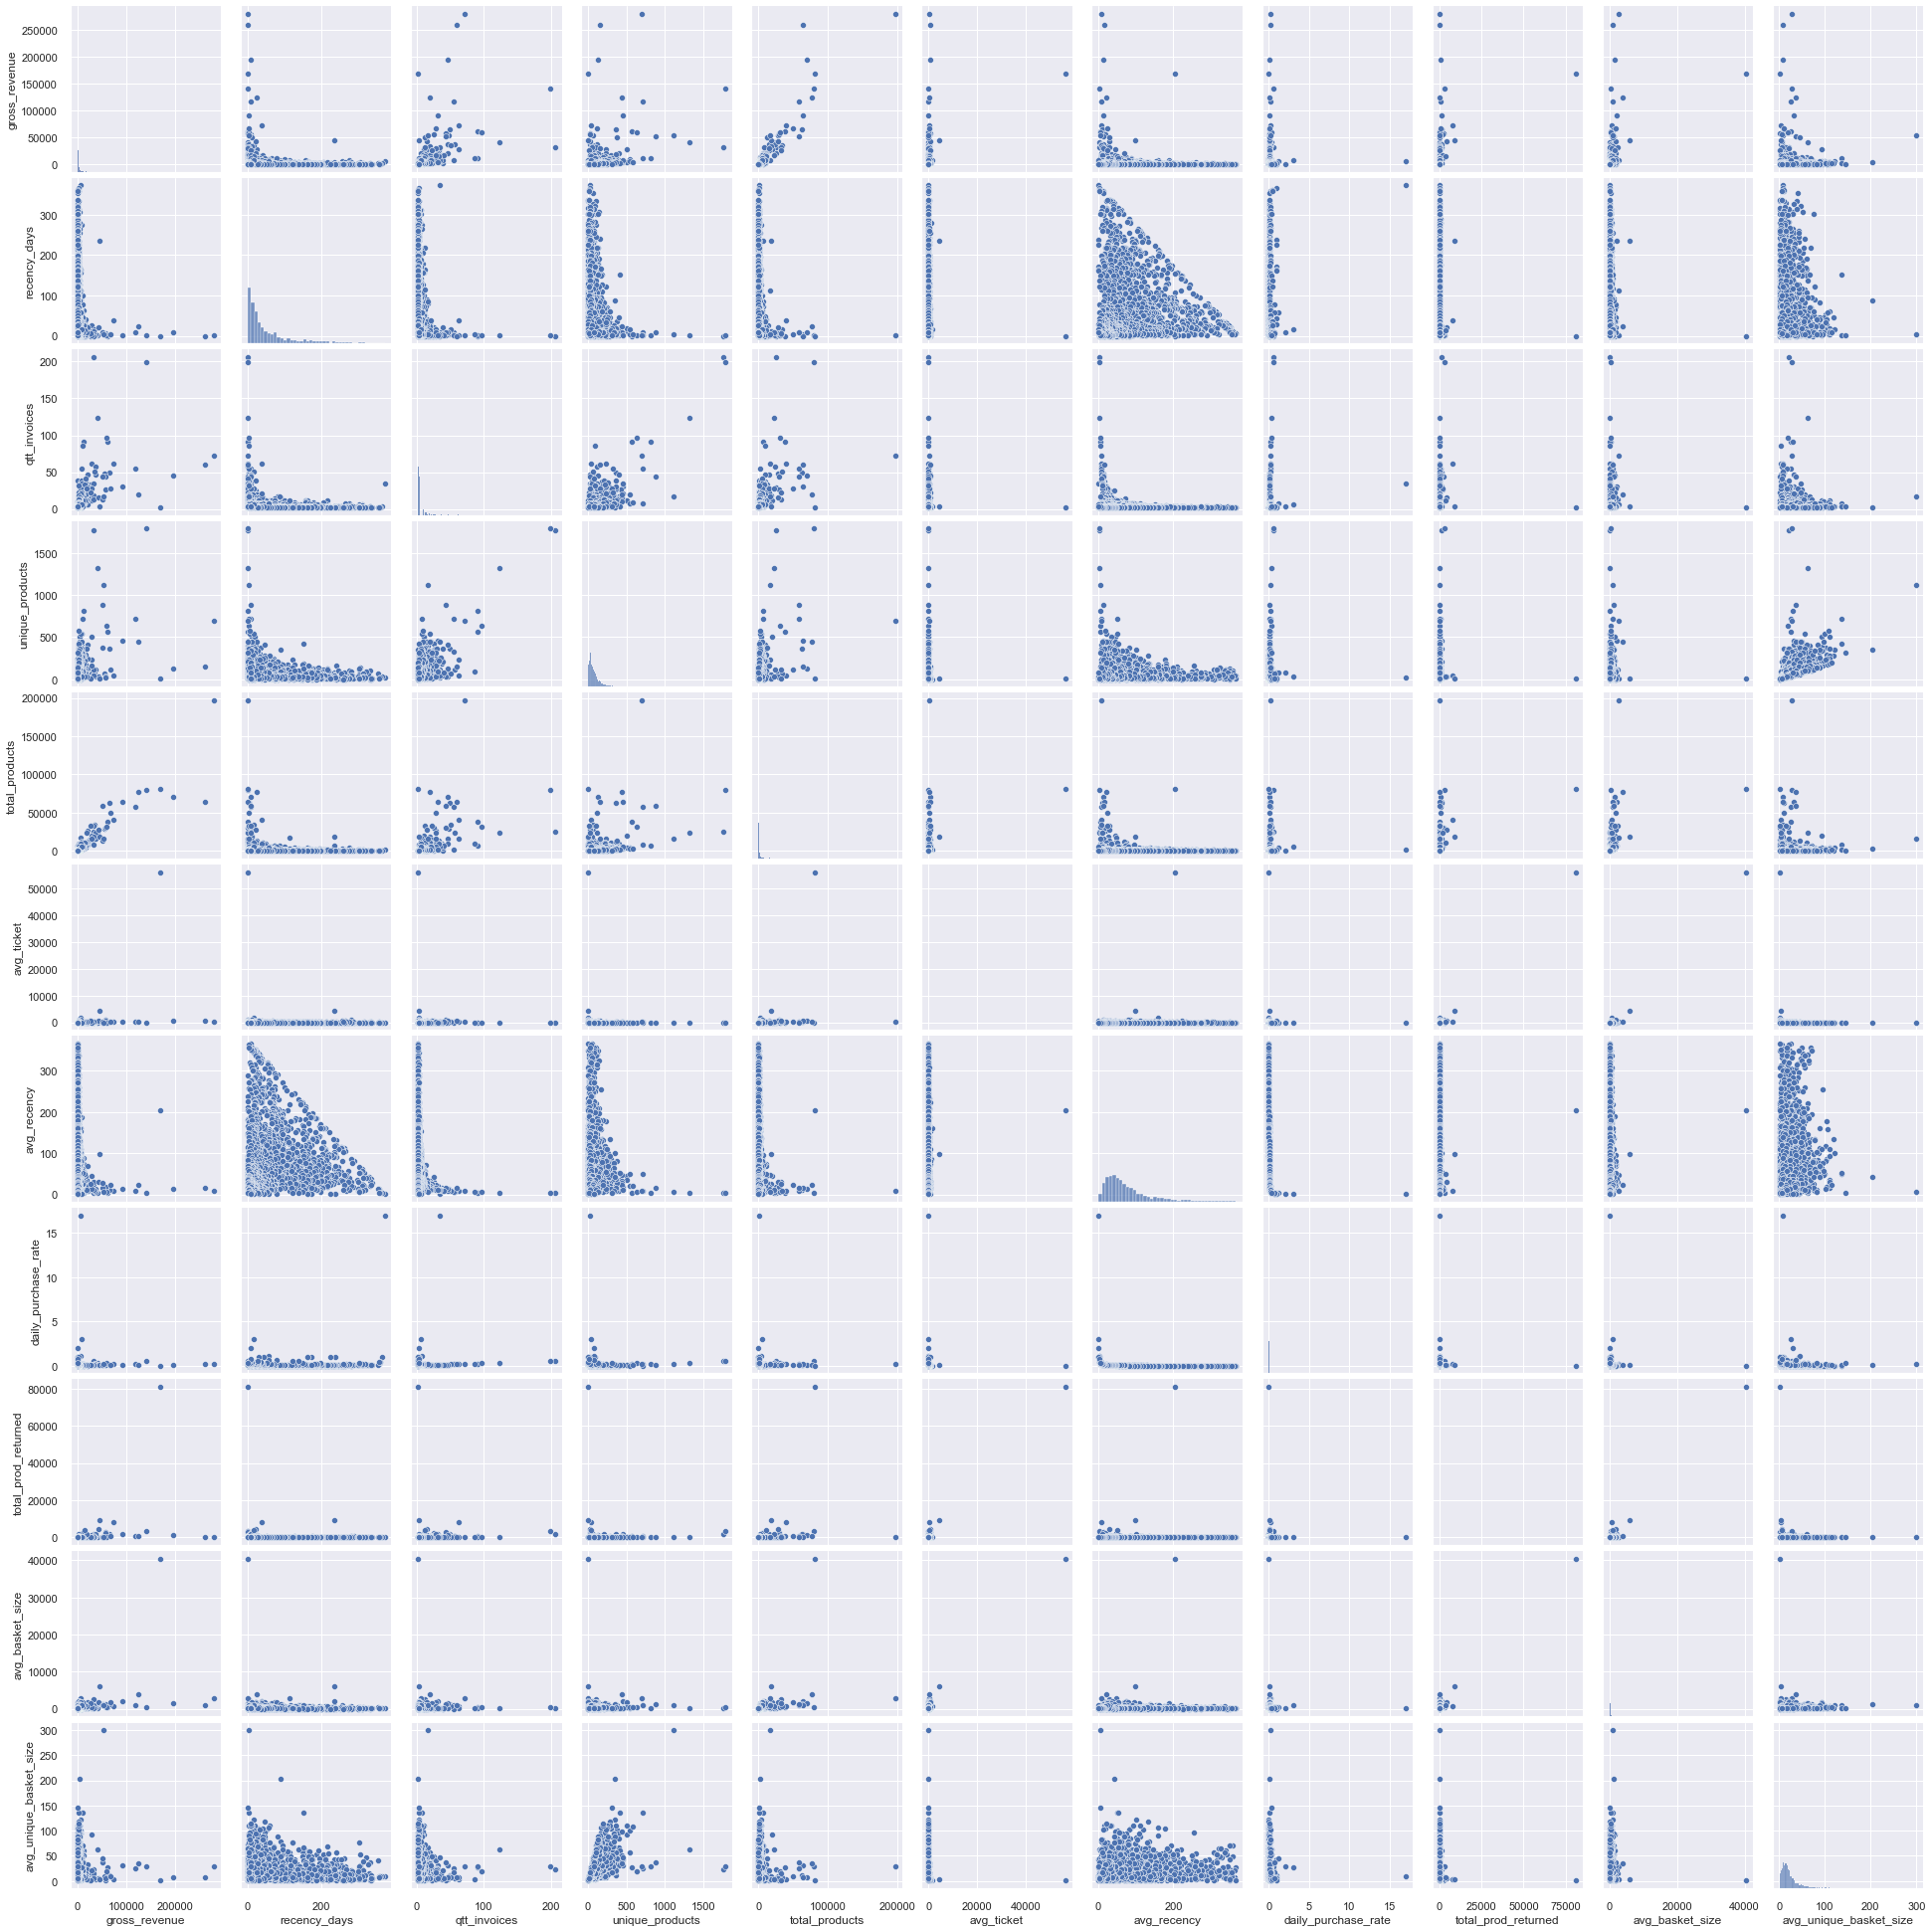

In [50]:
plt.figure(figsize=(25,12))
sns.pairplot(df4b)

# Data Preparation

In [450]:
#pass by now
df5 = df4.copy()

In [ ]:
# cycle 3: since we had worst results with StandardScaler than without it, let's finish this cycle without it!

/Users/home/opt/anaconda3/envs/pa005_clustering/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


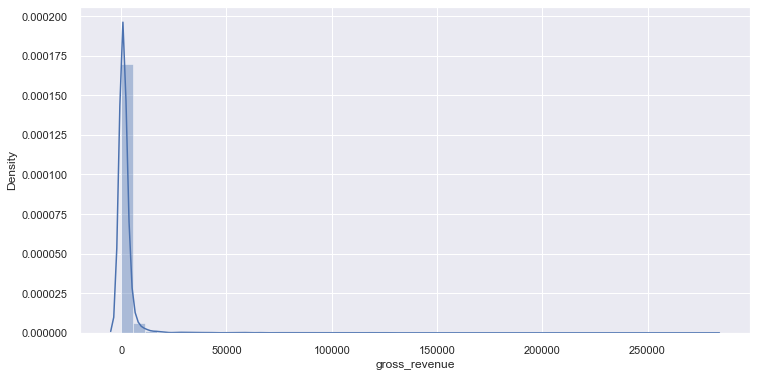

In [415]:
#data is too concentrated
#sns.distplot(df5['gross_revenue']);

In [417]:
#before tranforming
df5

,customer_id,gross_revenue,recency_days,invoice_no,avg_ticket
0,17850,5391.21,372.0,34.0,18.152222
1,13047,3232.59,56.0,9.0,18.904035
2,12583,6705.38,2.0,15.0,28.902500
3,13748,948.25,95.0,5.0,33.866071
4,15100,876.00,333.0,3.0,292.000000
...,...,...,...,...,...
4352,13436,196.89,1.0,1.0,16.407500
4353,15520,343.50,1.0,1.0,19.083333
4354,13298,360.00,1.0,1.0,180.000000
4355,14569,227.39,1.0,1.0,18.949167


In [420]:
#Standard Scaler, normalizing variables
# ss = pp.StandardScaler()

# df5['gross_revenue'] = ss.fit_transform(df5[['gross_revenue']])
# df5['recency_days'] = ss.fit_transform(df5[['recency_days']])
# df5['invoice_no'] = ss.fit_transform(df5[['invoice_no']])
# df5['avg_ticket'] = ss.fit_transform(df5[['avg_ticket']])

In [421]:
#transformedb
#df5

,customer_id,gross_revenue,recency_days,invoice_no,avg_ticket
0,17850,0.377179,2.791504,3.889207,-0.033935
1,13047,0.135378,-0.360996,0.620902,-0.033423
2,12583,0.524388,-0.899714,1.405296,-0.026618
3,13748,-0.120506,0.028079,0.097974,-0.023240
4,15100,-0.128600,2.402430,-0.163491,0.152447
...,...,...,...,...,...
4352,13436,-0.204671,-0.909690,-0.424955,-0.035122
4353,15520,-0.188249,-0.909690,-0.424955,-0.033301
4354,13298,-0.186400,-0.909690,-0.424955,0.076219
4355,14569,-0.201255,-0.909690,-0.424955,-0.033393


/Users/home/opt/anaconda3/envs/pa005_clustering/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


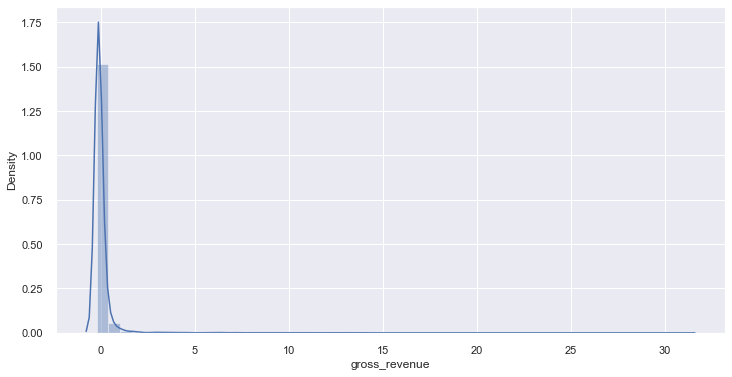

In [426]:
#distribution kept, but new scale now
sns.distplot(df5['gross_revenue']);

# Feature Selection

In [451]:
#pass by now
df6 = df5.copy()

# Hyperparameter Fine-Tuning

In [452]:
#drop customer_id
X = df6.drop('customer_id', axis=1).copy()
X.head()
#agora, temos 4 variáveis:

,gross_revenue,recency_days,invoice_no,avg_ticket
0,5391.21,372.0,34.0,18.152222
1,3232.59,56.0,9.0,18.904035
2,6705.38,2.0,15.0,28.902500
3,948.25,95.0,5.0,33.866071
4,876.00,333.0,3.0,292.000000


For a good clustering, we need clusters to have two properties:

- Compactness: smallest possible distance between the points of the same cluster.
- Separation: greatest possible distance between the points of different clusters.

Let's use k-means with 2 metrics: 

1 - Within-Cluster Sum of Square (WSS) - calculates Compactness 

2 - Silhouette Score (SS) - calculates Compactness and Separation

 


## Within-Cluster Sum of Square (WSS)

In [453]:
#up to 7 possible clusters now
clusters = [2, 3, 4, 5, 6, 7]

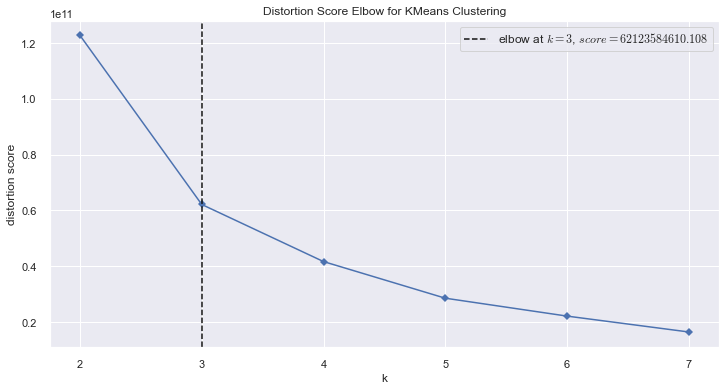

In [454]:
#let's use yellowbrick library, that inherits some functions from sklearn, and makes it easier to use performance metrics like WSS and SS
kmeans = KElbowVisualizer(c.KMeans(), k=clusters, timings=False )
kmeans.fit(X)
kmeans.show();
#it will sugest the number of clusters (dotted lines)

In [455]:
#The smaller the WSS, the smaller the sum of the distances within the clusters, which means that the points are closer to their centroid, so the cluster is more compact!

#even though with more cluster (5, 6, 7), we would have (a bit) more condensed clusters, the optimized number of clusters according to WSS is now 4.

## Silhouette Score

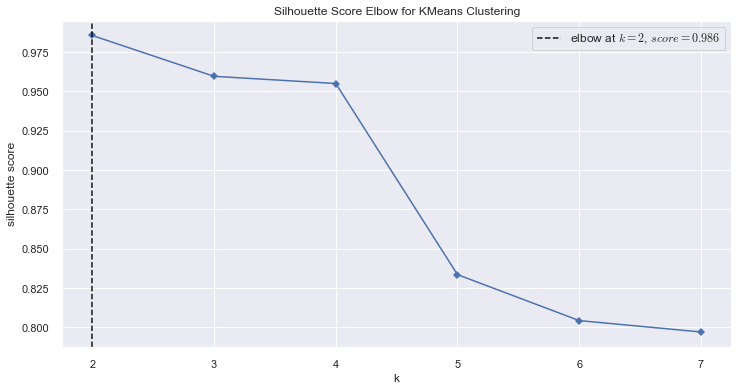

In [456]:
#calculate silhouette score also with yellowbrick library
kmeans = KElbowVisualizer(c.KMeans(), k=clusters, metric='silhouette', timings=False )
kmeans.fit(X)
kmeans.show();

In [457]:
#being SS=1 the best clustering result:
    # with 2 clusters, the result is 0.99 (awesome)
    # with 3 clusters, it is 0,96 (awesome)
    # with 4, or 5, we still have SS > 0.8, it's still very good!

#according to SS, the sugested cluster number is now 4, and it's SS IS over 0.95, what is great! 
#even 5 > 0.85, is still very good! Let's keep going with 5 by now. 

# Silhouette Analysis

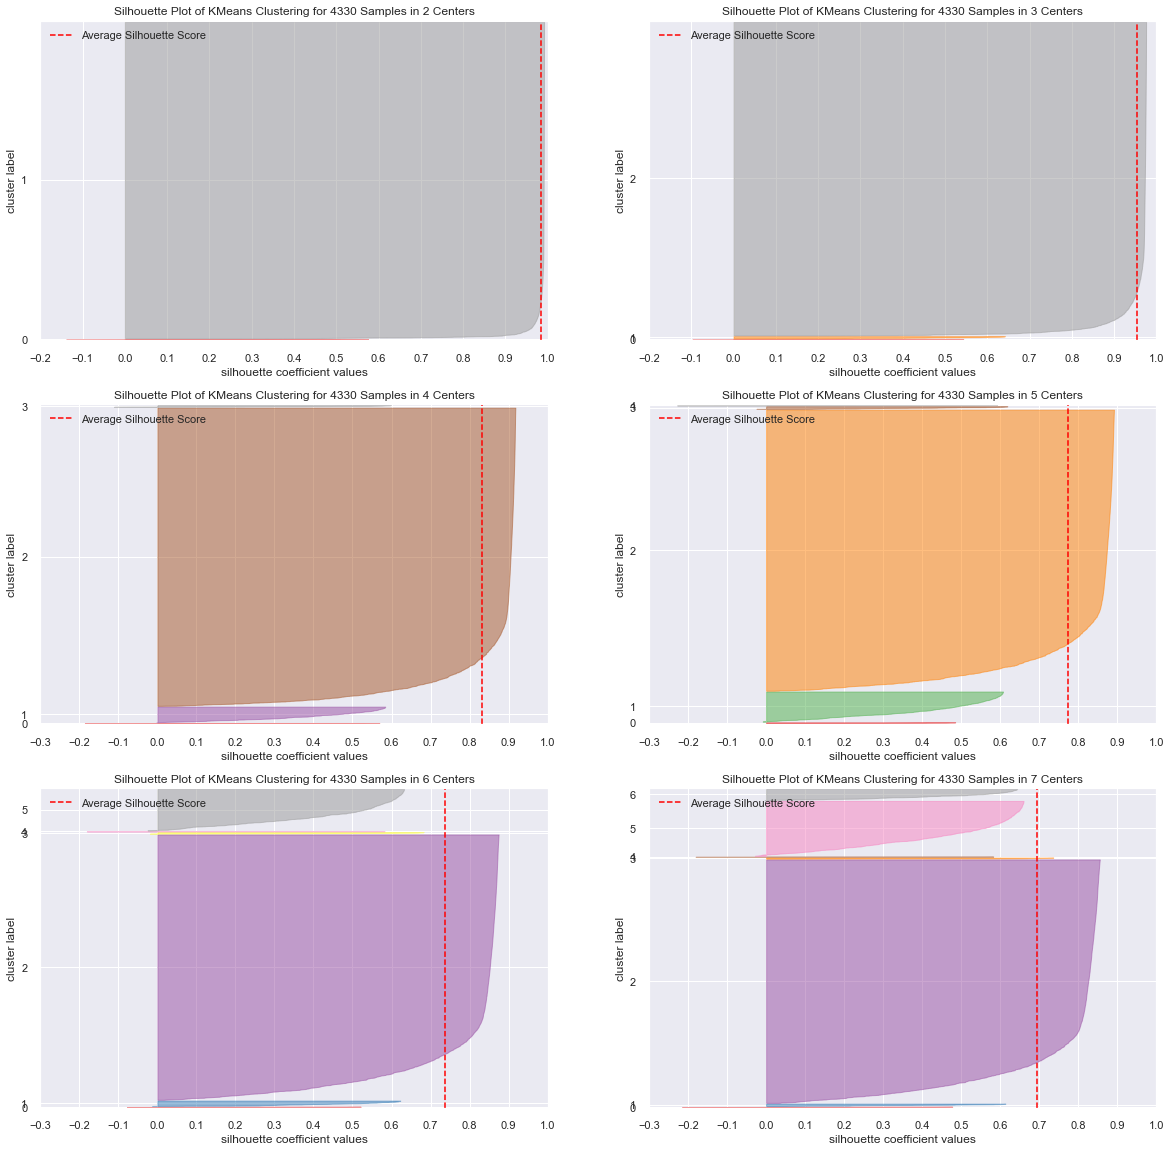

In [458]:
fig, ax = plt.subplots(3, 2, figsize=(20,20))
for k in clusters:
    #run kmeans
    km = c.KMeans(n_clusters=k, init='random', n_init=10, max_iter=100, random_state=42)
    #build positions to plot
    q, mod = divmod(k, 2)
    #plot silhouette
    visualizer = SilhouetteVisualizer(km, color='yellowbrick', ax=ax[q-1][mod])
    #plot silhouette analysis
    visualizer.fit(X)
    visualizer.finalize() #centers = clusters

In [459]:
#with our features, our data is still too grouped, and it's generating a cluster too big! It's absorving other minors.
#so, we it can be improved on next cycle. 
#for this third cycle, let's keep on with k=5.

# Model Training

## K-Means

In [460]:
# Let's then continue with the projectand train the k-means model with 4 clusters.

#model definition
k = 5
kmeans = c.KMeans( init='random', #init centroids ramdomly
                  n_clusters=k, #3
                  n_init=10, #Num of times k-means will be run with different centroid seeds.
                  max_iter=300, #up to 300 times
                 random_state=42) #seed, to generate the same random init
#model training
kmeans.fit(X)

#get cluster of each row
labels = kmeans.labels_

## Cluster Validation

In [461]:
#Metric: WSS (Within-cluster sum of square)

#this method of k-means (sklearn) returns the WSS
print(f'WSS Value: {kmeans.inertia_}')

WSS Value: 37802566787.37714


In [462]:
#Metric: SS (Silhouette Score)

#this method of k-means (sklearn) returns the SS
print(f'SS Value: {m.silhouette_score(X, labels, metric="euclidean")}')

SS Value: 0.7732515336579786


In [464]:
#the result for 5 clusters of SS=0.77 is in theory great!
#but, as can be seen on Silhouette Analysis, with 5 cluster, we still have 1 that represents almost all data! 
#So, thats obvious it will perform well, because is't almost all the data of the dataset.

# Cluster Analysis

In [465]:
df9 = df6.copy()
#create a cluster column with labels of it's cluster from k-means, to be able to plot colored clusters
df9['cluster'] = labels
df9.head()

,customer_id,gross_revenue,recency_days,invoice_no,avg_ticket,cluster
0,17850,5391.21,372.0,34.0,18.152222,1
1,13047,3232.59,56.0,9.0,18.904035,2
2,12583,6705.38,2.0,15.0,28.902500,1
3,13748,948.25,95.0,5.0,33.866071,2
4,15100,876.00,333.0,3.0,292.000000,2


## Visualization Inspection

/Users/home/opt/anaconda3/envs/pa005_clustering/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


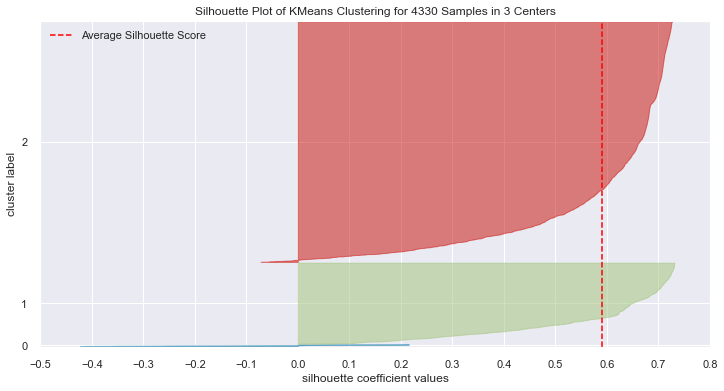

In [440]:
#there is no way to plot more than 3D charts, so let's use the Silhouette Plot
visualizer = SilhouetteVisualizer( kmeans, colors='yellowbrick' )
visualizer.fit( X )
visualizer.finalize()

## 2d Plot

In [466]:
#chech wich features are messing up with the clustering, but it's not good do take a decision just looking at the plot, because two "bad" features combined, can turn into a "good" feature
df9.head()

,customer_id,gross_revenue,recency_days,invoice_no,avg_ticket,cluster
0,17850,5391.21,372.0,34.0,18.152222,1
1,13047,3232.59,56.0,9.0,18.904035,2
2,12583,6705.38,2.0,15.0,28.902500,1
3,13748,948.25,95.0,5.0,33.866071,2
4,15100,876.00,333.0,3.0,292.000000,2


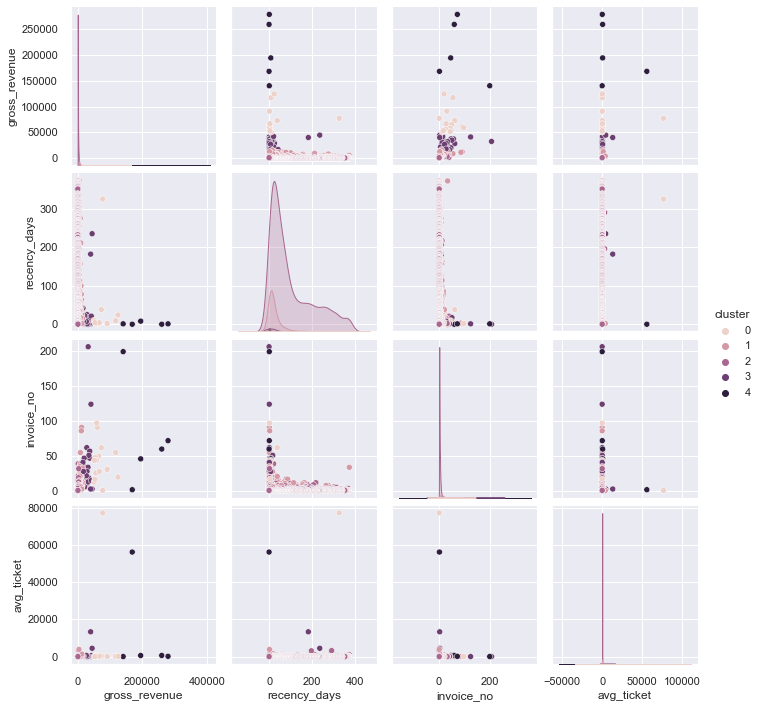

In [467]:
#plot pairplot to try to see patterns
df_viz = df9.drop(columns='customer_id', axis=1)
sns.pairplot(df_viz, hue='cluster')

## UMAP

In [468]:
X.head()

,gross_revenue,recency_days,invoice_no,avg_ticket
0,5391.21,372.0,34.0,18.152222
1,3232.59,56.0,9.0,18.904035
2,6705.38,2.0,15.0,28.902500
3,948.25,95.0,5.0,33.866071
4,876.00,333.0,3.0,292.000000


/Users/home/opt/anaconda3/envs/pa005_clustering/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

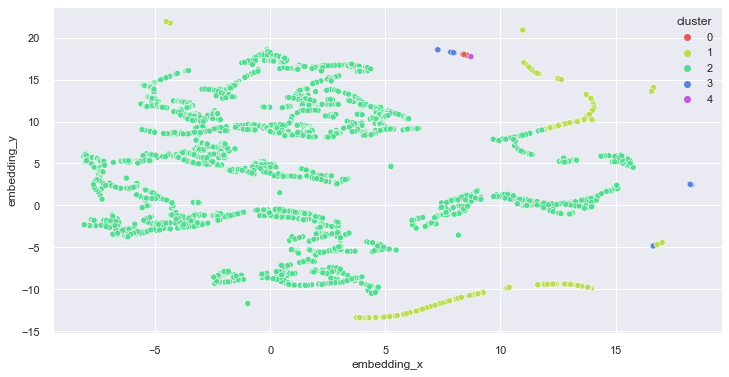

In [469]:
#n_neighbors=5

#reducer: high dimensionality projection
reducer = umap.UMAP( n_neighbors=5, #bigger: global structures, smaller: local structures (like a zoom!)
                    random_state=42 )
#fit variables in high dimensionality (x), projecting them in low dimensionality, generating the enbedding space
embedding = reducer.fit_transform( X )

# embedding
df_viz['embedding_x'] = embedding[:, 0] #component 1
df_viz['embedding_y'] = embedding[:, 1] #component 2

# plot UMAP
sns.scatterplot( x='embedding_x', y='embedding_y', 
                 hue='cluster', #cluster color
                 palette=sns.color_palette( 'hls', n_colors=len( df_viz['cluster'].unique() ) ),# formula to get the number of clusters automatically)
                 data=df_viz )

<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

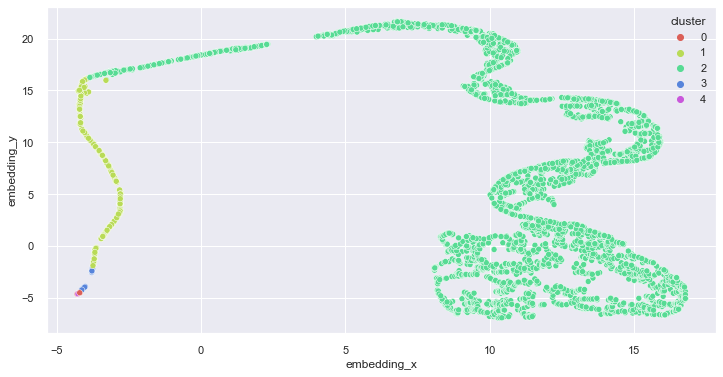

In [470]:
#n_neighbors=15
reducer = umap.UMAP( n_neighbors=15, random_state=42 )
embedding = reducer.fit_transform( X )
df_viz['embedding_x'] = embedding[:, 0]
df_viz['embedding_y'] = embedding[:, 1]
sns.scatterplot( x='embedding_x', y='embedding_y', hue='cluster', palette=sns.color_palette( 'hls', n_colors=len( df_viz['cluster'].unique() ) ), data=df_viz )

<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

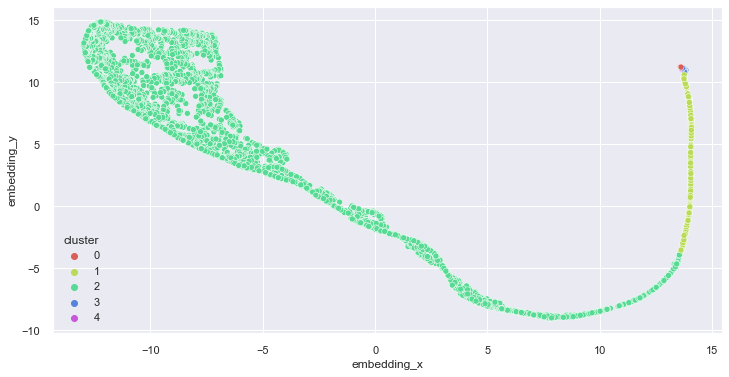

In [471]:
#n_neighbors=80
reducer = umap.UMAP( n_neighbors=80, random_state=42 )
embedding = reducer.fit_transform( X )
df_viz['embedding_x'] = embedding[:, 0]
df_viz['embedding_y'] = embedding[:, 1]
sns.scatterplot( x='embedding_x', y='embedding_y', hue='cluster', palette=sns.color_palette( 'hls', n_colors=len( df_viz['cluster'].unique() ) ), data=df_viz )

In [472]:
#Clustering is good better at umap in third cycle, but we still have more than 90% of being one big cluster, so let's work on data on next cycles to improve this.

## t-SNE

In [473]:
#next cycles
pass

## Cluster Profile

In [474]:
#using 4 metrics, with avg_ticket to represent the centroid of the group (mean), let's understand who are the people inside each cluster

In [475]:
df9.head()

,customer_id,gross_revenue,recency_days,invoice_no,avg_ticket,cluster
0,17850,5391.21,372.0,34.0,18.152222,1
1,13047,3232.59,56.0,9.0,18.904035,2
2,12583,6705.38,2.0,15.0,28.902500,1
3,13748,948.25,95.0,5.0,33.866071,2
4,15100,876.00,333.0,3.0,292.000000,2


In [476]:
#building df_cluster

# Number of customer
df_cluster = df9[['customer_id', 'cluster']].groupby('cluster').count().reset_index()
df_cluster['perc_customer'] = df_cluster['customer_id'] / df_cluster['customer_id'].sum()*100
# Agg gross revenue
df_avg_gross_revenue = df9[['gross_revenue','cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_gross_revenue, how='inner', on='cluster')
# Avg recency days
df_avg_recency_days = df9[['recency_days','cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_recency_days, how='inner', on='cluster')
# Avg invoice number
df_avg_invoice_no = df9[['invoice_no','cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_invoice_no, how='inner', on='cluster')
# Avg ticket
df_avg_ticket = df9[['avg_ticket','cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_ticket, how='inner', on='cluster')
# cluster profiles
df_cluster

,cluster,customer_id,perc_customer,gross_revenue,recency_days,invoice_no,avg_ticket
0,0,15,0.346420,70563.601333,29.333333,41.800000,5319.257814
1,1,413,9.538106,5932.363584,26.193705,12.377724,60.568214
2,2,3859,89.122402,843.890329,100.341798,2.847370,28.490561
3,3,38,0.877598,25177.080000,17.789474,34.184211,585.440059
4,4,5,0.115473,208453.866000,2.000000,75.800000,11499.503365


In [477]:
#generate the repport dinamically:
for i in range(len(df_cluster['customer_id'])):
    print(f""" Cluster {df_cluster['cluster'][i]}:
    -Number of customers: {df_cluster['customer_id'][i]} ({round(df_cluster['perc_customer'][i],1)}%)
    -Average revenue: ${round(df_cluster['gross_revenue'][i])}
    -Average recency: by each {round(df_cluster['recency_days'][i])} days ({round(df_cluster['recency_days'][i]/7)} week(s))
    -Average purchases: {round(df_cluster['invoice_no'][i])}  
    -Average ticket: ${round(df_cluster['avg_ticket'][i])} \n """)

 Cluster 0:
    -Number of customers: 15 (0.3%)
    -Average revenue: $70564
    -Average recency: by each 29 days (4 week(s))
    -Average purchases: 42  
    -Average ticket: $5319 
 
 Cluster 1:
    -Number of customers: 413 (9.5%)
    -Average revenue: $5932
    -Average recency: by each 26 days (4 week(s))
    -Average purchases: 12  
    -Average ticket: $61 
 
 Cluster 2:
    -Number of customers: 3859 (89.1%)
    -Average revenue: $844
    -Average recency: by each 100 days (14 week(s))
    -Average purchases: 3  
    -Average ticket: $28 
 
 Cluster 3:
    -Number of customers: 38 (0.9%)
    -Average revenue: $25177
    -Average recency: by each 18 days (3 week(s))
    -Average purchases: 34  
    -Average ticket: $585 
 
 Cluster 4:
    -Number of customers: 5 (0.1%)
    -Average revenue: $208454
    -Average recency: by each 2 days (0 week(s))
    -Average purchases: 76  
    -Average ticket: $11500 
 


In [478]:
#there is more than 89% of customers in one cluster (2), so we need to keep work on data to improve this on next cycle.

# Deploy

In [145]:
#in the future